In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sbpcreator as sc
import numpy as np
import os
import copy
import sys
sys.path.append("..\\")
from pythonGUI.config import cfg
SBPFOLDER = cfg.shopbot.sbpFolder

In [3]:
slideW = 25 # mm
slideH = 75 # mm
margin = 5 # mm
#spacing = (slideH-2*margin)/12 # mm
spacing=5
nid = 0.603 # nozzle inner diameter
nd = nid + 0.152*2 # mm # nozzle = 0.603 mm ID x 0.152 mm OD x 1.5" tall (20 gauge needle)
downdisp = 0
wait1=0.5
wait2=0.5

dv = sc.defVars(slideW=slideW, slideH = slideH, margin=margin, spacing=spacing, nd=nd, downdisp=downdisp, diam=0.603, wait1=wait1, wait2=wait2)
dv.setUnits()
dv.setSpeeds(m=10, j=20)
# dv.turnOn(0);

### double lines

Exported file C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\SBP files\underSlide.sbp


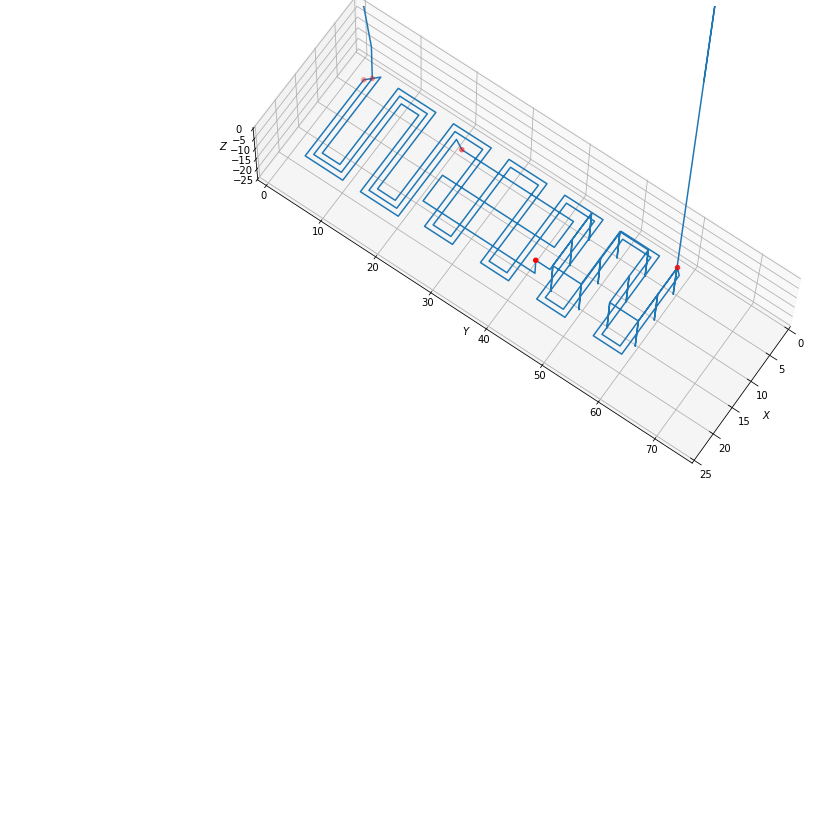

In [17]:
total = dv

total = total + sc.startingPoint(0,0,0)
total.turnOn(3)

zz = sc.zigzag(lastPt=total)
zz.x0 = '&margin'
zz.y0 = '&margin'
zz.z0 = '-25+2*&margin'
zz.spacing1 = '&spacing'
zz.spacing2 = '&spacing'
zz.updateReps(slideH, margin, 3)
total = total + zz

zz2 = sc.zigzag(lastPt=total)
zz2.x0 = sc.p(zz2.x0, '-&nd')
zz2.y0 = sc.p(zz2.y0, '-&nd')
zz2.longdir = '+x'
zz2.shortdir = '-y'
zz2.spacing1 = '(&spacing+2*&nd)'
zz2.spacing2 = '(&spacing-2*&nd)'
zz2.updateReps(slideH, margin, 3)
total = total + zz2

zz3 = sc.zigzag(lastPt=total)
zz3.x0 = sc.p(zz3.x0, '2*&nd')
zz3.y0 = sc.p(zz3.y0, '-2*&nd')
zz3.longdir = '+x'
zz3.shortdir = '+y'
zz3.spacing1 = '(&spacing-2*&nd)'
zz3.spacing2 = '(&spacing+2*&nd)'
zz3.reps=int(zz2.reps/3)
total = total + zz3

zz4 = sc.zigzag(lastPt = total)
zz4.x0 = sc.p(zz4.x0, '&nd')
zz4.y0 = sc.p(zz4.y0, '(&spacing-2*&nd)/2')
zz4.longdir = '+y'
zz4.shortdir = '+x'
zz4.spacing1 = '&spacing'
zz4.spacing2 = '&spacing'
zz4.reps = 3
zz4.width = '4*&spacing'
total = total + zz4

v1 = sc.verts(zigzag=zz2, start=3, end=0, disp='&nd', lastPt=total)

v1.downdisp = '&downdisp'
v1.setSpacing(5)
v1.longlist = [sc.p(i,2) for i in v1.longlist]
total = total + v1
total.turnOff(3)
total.withdraw()
total.plot()
total.export(os.path.join(SBPFOLDER, 'underSlide.sbp'), [])
# print(total.convertFile('spacing'))

Exported file C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\SBP files\sideHorizSlide.sbp


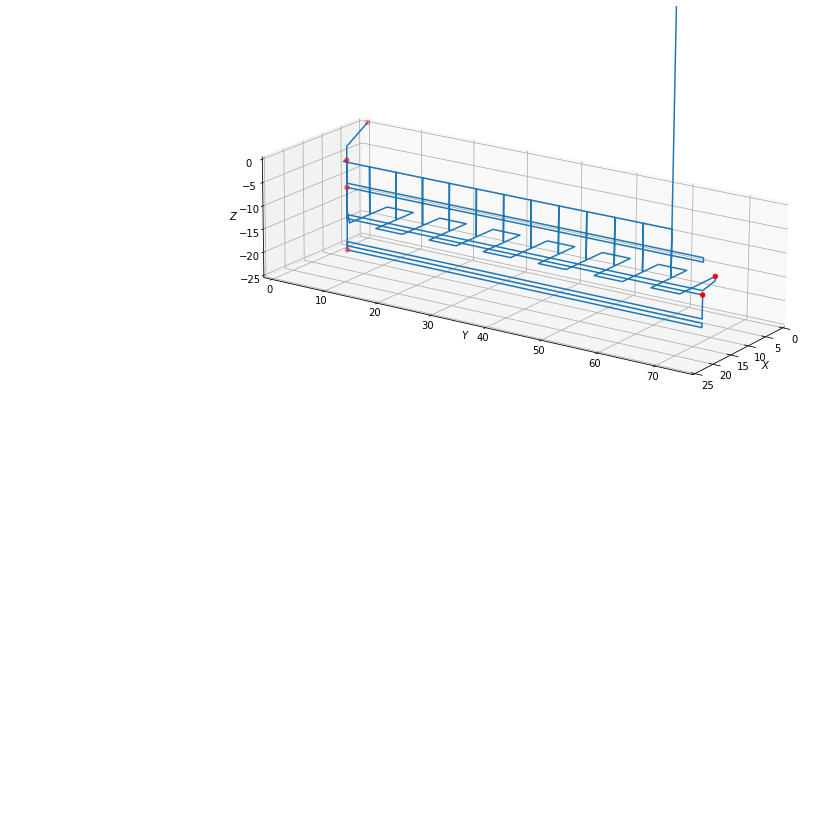

In [18]:
total = dv
xmed = slideW/2

total = total + sc.startingPoint(0,0,0)
total.turnOn(3)

zz = sc.zigzag(lastPt=total)
zz.x0 = xmed
zz.y0 = '&margin'
zz.z0 = '(-&slideW+&margin/2)'
zz.longdir = '+y'
zz.shortdir = '+z'
zz.spacing1 = '&nd'
zz.spacing2 = '&nd'
zz.width = '(&slideH-2*&margin)'
zz.reps=3
total = total + zz

zz2 = sc.zigzag(lastPt=total)
zz2.z0 = sc.p(zz2.z0, '&spacing')
zz2.longdir = '-y'
zz2.shortdir = '+z'
zz2.spacing1 = '&nd'
zz2.spacing2 = '&nd'
zz2.reps=2
zz2.width = '(&slideH-2*&margin)'
total = total + zz2

zz3 = sc.zigzag(lastPt=total)
zz3.z0 = sc.p(zz3.z0, '&nd')
# zz3.x0 = sc.p(xmed, '-&slideW/2+&margin')
zz3.x0 = sc.p(xmed, '-&margin')
zz3.y0 = sc.p(zz3.y0, '-&nd')
zz3.longdir = '+x'
zz3.shortdir = '-y'
zz3.spacing1 = '&spacing'
zz3.spacing2 = '&spacing'
# zz3.width = '&slideW-2*&margin'
zz3.width = '2*&margin'
zz3.updateReps(slideH, margin, 1)
total = total + zz3

zz4 = sc.zigzag(lastPt = total)
zz4.x0 = xmed
zz4.y0 = '&margin'
zz4.z0 = sc.p(zz4.z0, '&spacing')
zz4.longdir = '+y'
zz4.shortdir = '+z'
zz4.spacing1 = '&nd'
zz4.spacing2 = '&nd'
zz4.reps=2
zz4.width = '&slideH-2*&margin'
total = total + zz4

v1 = sc.verts(lastPt=total)
v1.singleUpDownRow(direc='+y', longlist=['2*&margin', '&slideH-&margin'], const=sc.p(xmed, '&nd'), spacing1='&spacing')
v1.setZBounds(v1.cp[2], '&spacing')
v1.downdisp = '&downdisp'

total = total + v1


total.turnOff(3)
total.withdraw()

total.plot(ele=20)


total.export(os.path.join(SBPFOLDER, 'sideHorizSlide.sbp'), [])
# print(total.convertFile('spacing'))

<Axes3DSubplot:xlabel='$X$', ylabel='$Y$'>

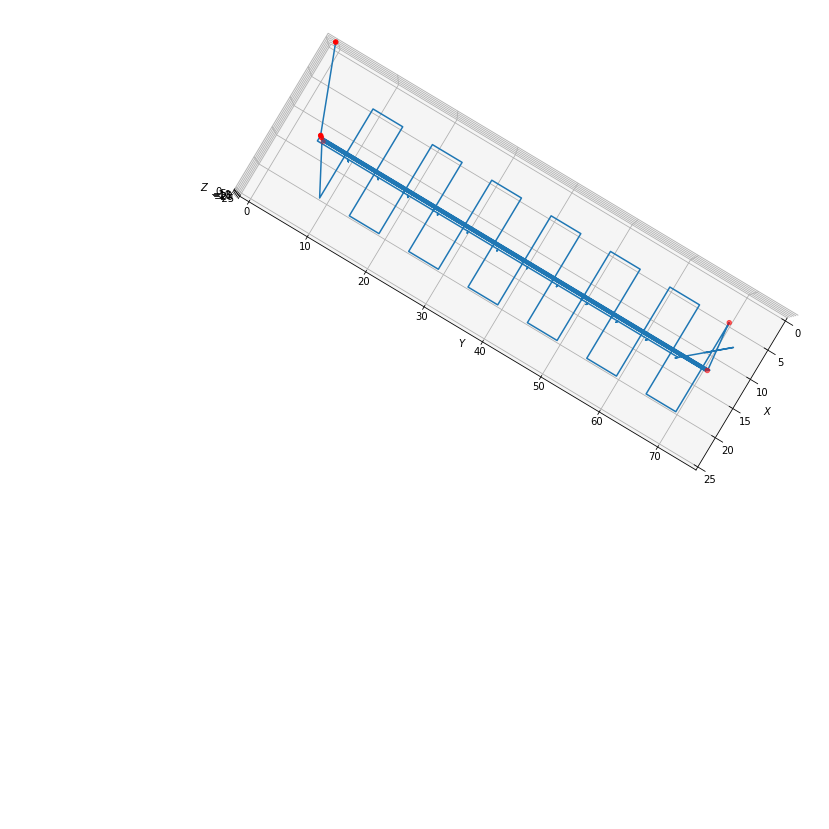

In [37]:
total.plot(ele=90)

Exported file C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\SBP files\sideVertSlide.sbp


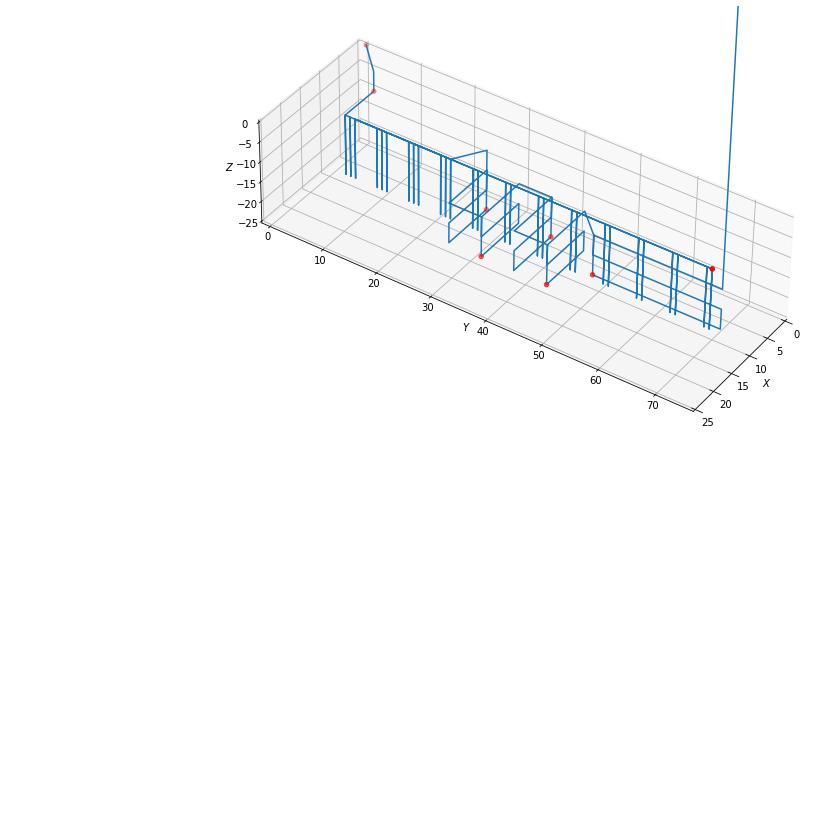

In [19]:
total = dv
xmed = slideW/2

total = total + sc.startingPoint(0,0,0)
total.m2(5,5)
total.turnOn(3)

v1 = sc.verts(lastPt=total)
v1.singleUpDownRow(direc='+y', longlist=['&margin', '&slideH'], const=xmed, spacing2='&nd', spacing1='&spacing')
v1.zmax = '-&margin'
v1.zmin = '-&slideW+&margin'
v1.downdisp = 0
total = total + v1

v2 = sc.verts(lastPt=total)
v2.singleUpDownRow(direc='+y', longlist=['&margin+2*&nd', '35'], const=xmed, spacing1='&spacing+&nd')
v2.zmax = '-&margin'
v2.zmin = '-&slideW+&margin'
v2.downdisp = 0
total = total + v2

for i in [8,10,12,14]:
    zz3 = sc.zigzag(lastPt=total)
    zz3.z0 = '&margin-&slideW'
    
    
    zz3.y0 = sc.p(v1.longlist[i], '-&nd')
    if i==8 or i==12:
        zz3.longdir = '+x'
        zz3.x0 = sc.p(v1.shortlist[0], '-&spacing')
    else:
        zz3.longdir = '-x'
        zz3.x0 = sc.p(v1.shortlist[0], '&spacing')
    zz3.shortdir = '+z'
    zz3.spacing1 = '&spacing'
    zz3.spacing2 = '&spacing'
    zz3.width = '2*&spacing'
    zz3.updateReps(slideW, margin, 1)
    total = total + zz3
    
zz4 = sc.zigzag(lastPt = total)
zz4.x0 = sc.p(v1.shortlist[0], '-&nd')
zz4.y0 = sc.p(v1.longlist[16], '-&spacing/2')
zz4.z0 = '&margin-&slideW'
zz4.longdir = '+y'
zz4.shortdir = '+z'
zz4.spacing1 = '&spacing'
zz4.spacing2 = '&spacing'
zz4.reps=3
zz4.width = '&spacing*4.5'
total = total + zz4




total.turnOff(3)
total.withdraw()
total.plot(ele=40)
total.export(os.path.join(SBPFOLDER, ,'sideVertSlide.sbp'), [])
# print(total.convertFile('spacing'))

### single Lines

0.057829512760943516  mL


<Axes3DSubplot:xlabel='$X$', ylabel='$Y$'>

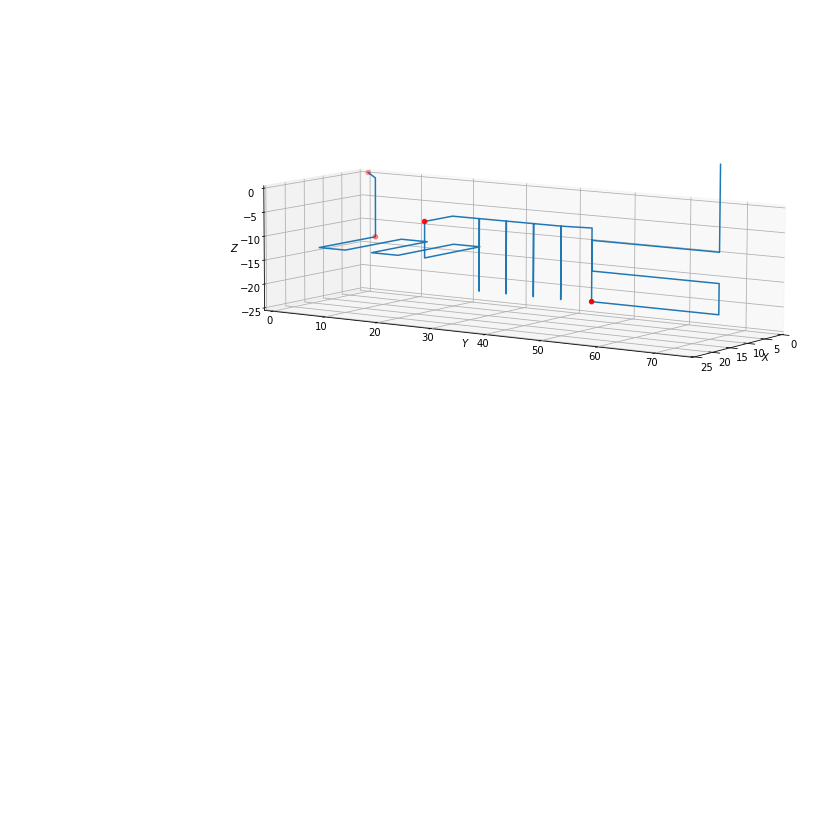

In [331]:
total = copy.deepcopy(dv)

total = total + sc.startingPoint(0,0,0)
total.turnOn(3)

zz = sc.zigzag(lastPt=total, killZigs=True)
zz.x0 = '&margin'
zz.y0 = '&margin'
zz.z0 = '-&slideW/2'
zz.spacing1 = '&spacing'
zz.spacing2 = '&spacing'
zz.updateReps(slideH/2, margin, 1)
total = total + zz

xmed = slideW/2
v1 = sc.verts(lastPt=total)
v1.singleUpDownRow(direc='+y', longlist=['&slideH/3+&margin', '&slideH*2/3'], const=xmed, spacing2='&spacing', spacing1='&spacing')
v1.zmax = '-&margin'
v1.zmin = '-&slideW+&margin'
v1.downdisp = 0
total = total + v1

zz4 = sc.zigzag(lastPt = total, killZigs=True)
zz4.x0 = sc.p(v1.shortlist[0], '-&nd')
zz4.y0 = sc.p(v1.longlist[-1], '&spacing')
zz4.z0 = '&margin-&slideW'
zz4.longdir = '+y'
zz4.shortdir = '+z'
zz4.spacing1 = '&spacing*1.25'
zz4.spacing2 = '&spacing*1.25'
zz4.reps=3
zz4.width = '&spacing*4.5'
total = total + zz4


total.turnOff(3)
total.mz(10)
print(total.volume/1000, ' mL')
# total.withdraw()
total.plot(ele=10)
#total.export(os.path.join(SBPFOLDER, 'singleLinesNoZig.sbp'), [])
# print(total.convertFile('spacing'))

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\singleLinesNoZig_fullLines.sbp


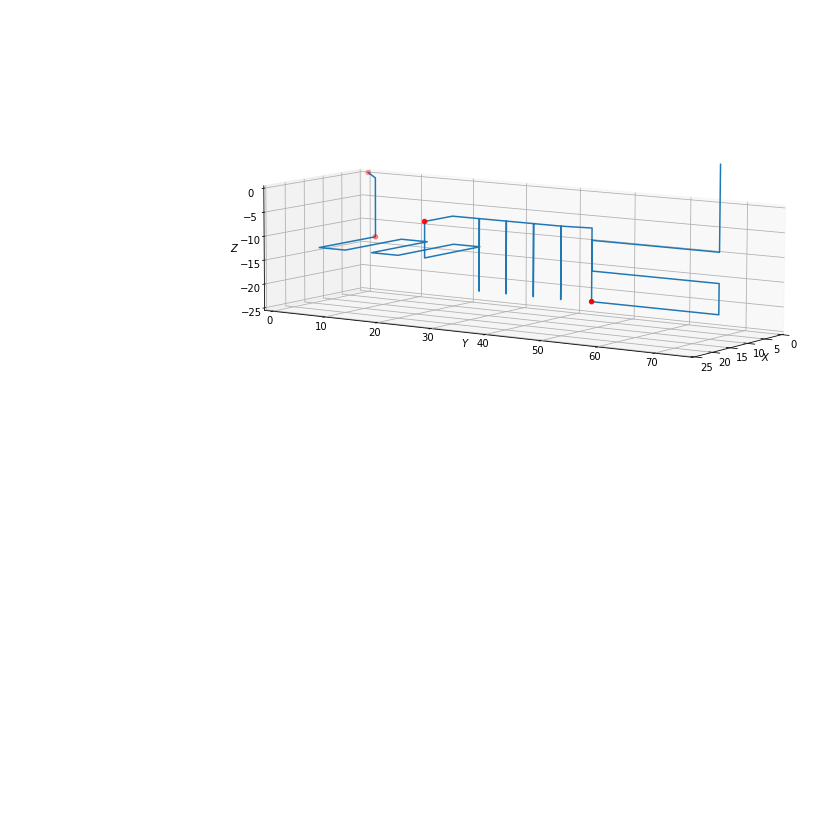

In [11]:
total = copy.deepcopy(dv)

total = total + sc.startingPoint(0,0,0)
total.turnOn(3)

zz = sc.zigzag(lastPt=total, killZigs=True)
zz.x0 = '&margin'
zz.y0 = '&margin'
zz.z0 = '-&slideW/2'
zz.spacing1 = '&spacing'
zz.spacing2 = '&spacing'
zz.updateReps(slideH/2, margin, 1)
total = total + zz

xmed = slideW/2
v1 = sc.verts(lastPt=total)
v1.singleUpDownRow(direc='+y', longlist=['&slideH/3+&margin', '&slideH*2/3'], const=xmed, spacing2='&spacing', spacing1='&spacing')
v1.zmax = '-&margin'
v1.zmin = '-&slideW+&margin'
v1.downdisp = 0
total = total + v1

zz4 = sc.zigzag(lastPt = total, killZigs=True)
zz4.x0 = sc.p(v1.shortlist[0], '-&nd')
zz4.y0 = sc.p(v1.longlist[-1], '&spacing')
zz4.z0 = '&margin-&slideW'
zz4.longdir = '+y'
zz4.shortdir = '+z'
zz4.spacing1 = '&spacing*1.25'
zz4.spacing2 = '&spacing*1.25'
zz4.reps=3
zz4.width = '&spacing*4.5'
total = total + zz4


total.turnOff(3)
total.mz(10)
# total.withdraw()
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesNoZig_fullLines.sbp'), [])
# print(total.convertFile('spacing'))

### singleLinesPics

Exported file C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\software\SBP files\singleLinesPics.sbp


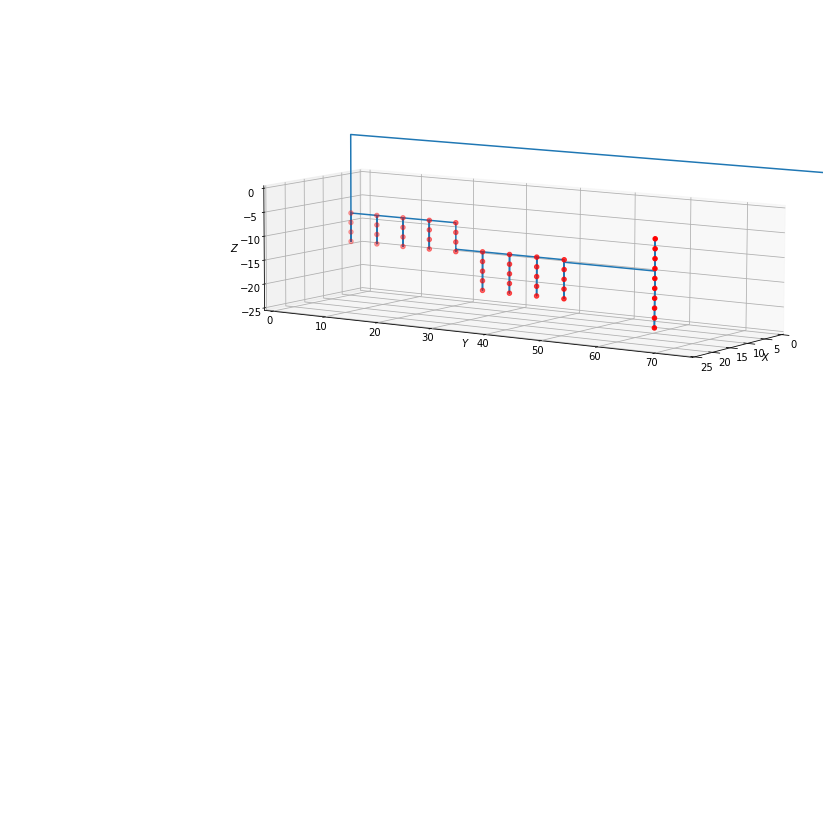

In [41]:
import copy

total = copy.deepcopy(dv)

total.turnOn(3)


pic = sc.pics(channel=2, wait=2, lastPt=zz4)
pic.my(sc.mean(zz4.longlist[0], zz4.longlist[-1]))
for z in np.arange(-24, -4, 2):
    pic.mz(z)
    pic.snap()
    
pic.mz(sc.mean(v1.zmax, v1.zmin))
l1 = copy.deepcopy(v1.longlist)
# l1.reverse()
for y in l1:
    pic.my(y)
    for z in np.arange(-20, -10, 2):
        pic.mz(z)
        pic.snap()

# print(pic.convertPts(pic.positions))
 
yli = copy.deepcopy(zz.shortlist)
# yli.reverse()
for y in yli:
    pic.my(y)
    for zadd in range(0, 8, 2):
        pic.mz(sc.p(zz.z0, zadd))
        pic.snap()
total = total+pic



total.withdraw()
# print(total.convertFile(['margin', 'slideW', 'spacing', 'slideH']))
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesPics.sbp'), [])


Exported file C:/Users/lmf1/Documents/GitHub/ShopbotPyQt/SBP files\singleLinesPics2.sbp


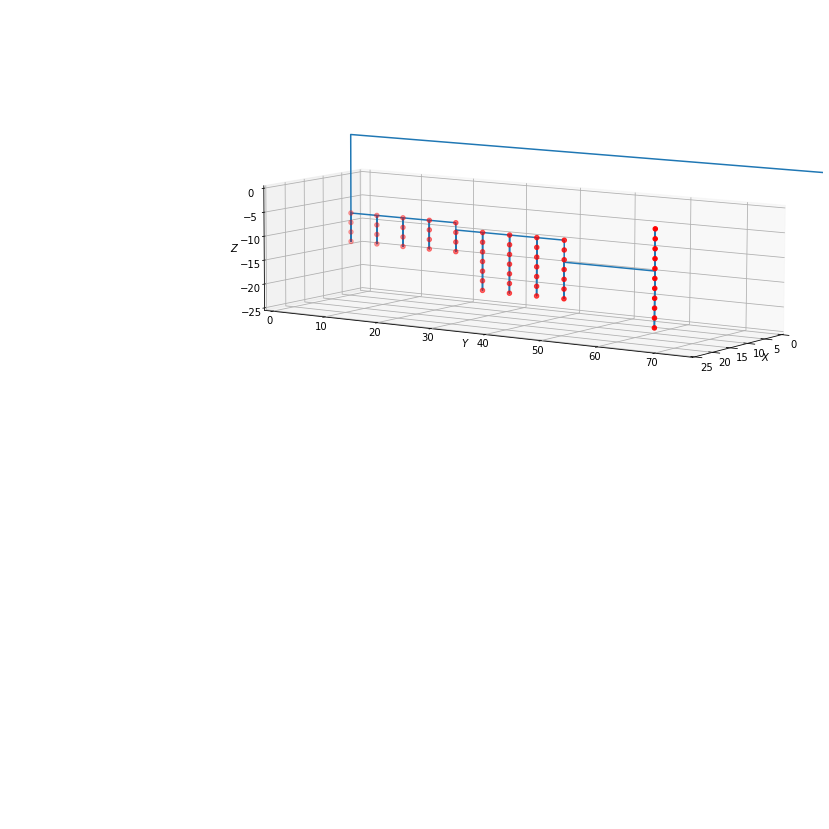

In [10]:
import copy
vardefs = {'wait1':1, 'wait2':1}
total = copy.deepcopy(dv)

total.turnOn(3)

pic = sc.pics(channel=2, wait=2, lastPt=zz4)
pic.my(sc.mean(zz4.longlist[0], zz4.longlist[-1]))
for z in np.arange(-24, -2, 2):
    pic.mz(z)
    pic.snap()
    
pic.mz(sc.mean(v1.zmax, v1.zmin))
l1 = copy.deepcopy(v1.longlist)
l1.reverse()
for y in l1:
    pic.my(y)
    for z in np.arange(-20, -6, 2):
        pic.mz(z)
        pic.snap()

# print(pic.convertPts(pic.positions))
 
yli = copy.deepcopy(zz.shortlist)
yli.reverse()
for y in yli:
    pic.my(y)
    for zadd in range(0, 8, 2):
        pic.mz(sc.p(zz.z0, zadd))
        pic.snap()
total = total+pic



total.withdraw()
# print(total.convertFile(['margin', 'slideW', 'spacing', 'slideH']))
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesPics2.sbp'), [])


Exported file C:/Users/lmf1/Documents/GitHub/ShopbotPyQt/SBP files\singleLinesPics4.sbp


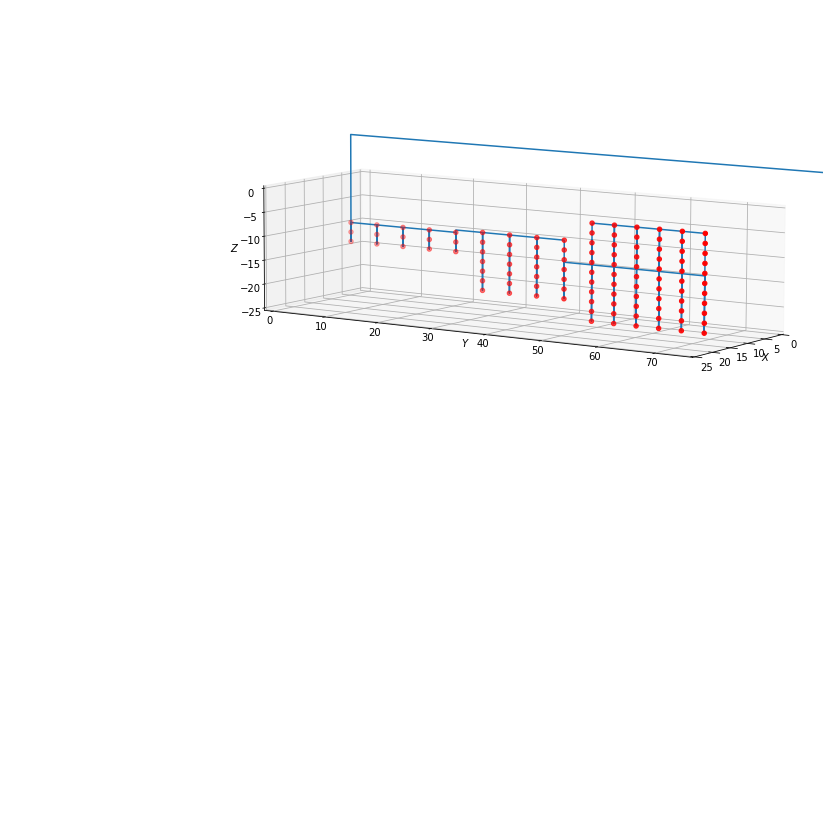

In [8]:
import copy
vardefs = {'wait1':1, 'wait2':1}
total = copy.deepcopy(dv)

total.turnOn(3)

pic = sc.pics(channel=2, wait=2, lastPt=zz4)
for y in np.arange(50, 72.5, 4 ):
    pic.my(y)
    for z in np.arange(-24, -2, 2):
        pic.mz(z)
        pic.snap()
    
pic.mz(sc.mean(v1.zmax, v1.zmin))
l1 = copy.deepcopy(v1.longlist)
l1.reverse()
for y in l1:
    pic.my(y)
    for z in np.arange(-20, -6, 2):
        pic.mz(z)
        pic.snap()

# print(pic.convertPts(pic.positions))
 
yli = copy.deepcopy(zz.shortlist)
yli.reverse()
for y in yli:
    pic.my(y)
    for zadd in range(0, 6, 2):
        pic.mz(sc.p(zz.z0, zadd))
        pic.snap()
total = total+pic



total.withdraw()
# print(total.convertFile(['margin', 'slideW', 'spacing', 'slideH']))
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesPics4.sbp'), [])


Exported file C:/Users/lmf1/Documents/GitHub/ShopbotPyQt/SBP files\singleLinesPics5.sbp


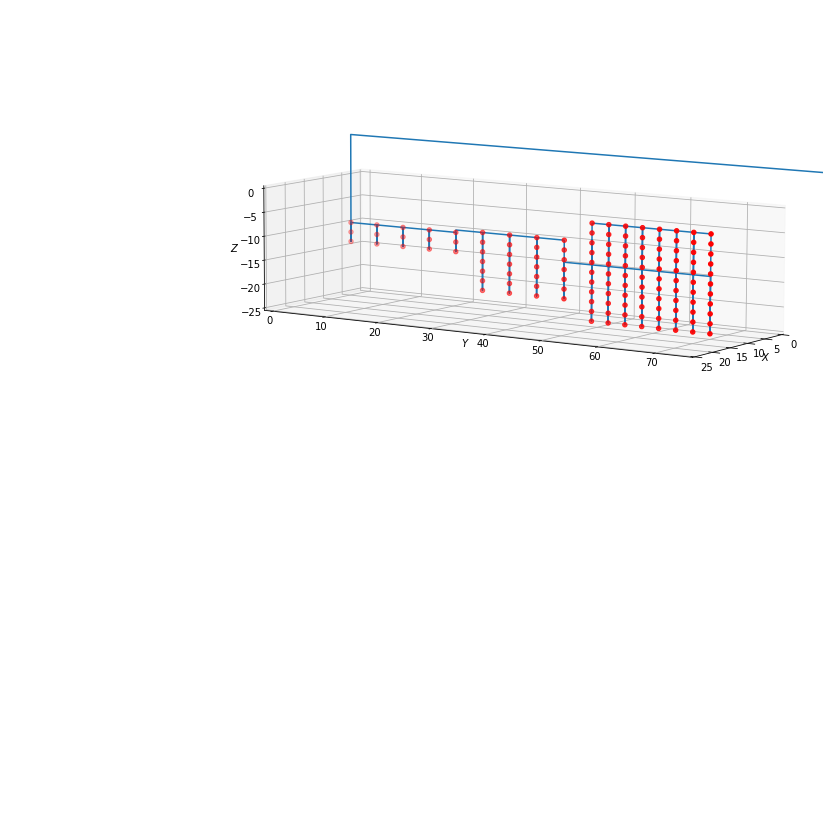

In [7]:
import copy
vardefs = {'wait1':1, 'wait2':1}
total = copy.deepcopy(dv)

total.turnOn(3)

pic = sc.pics(channel=2, wait=2, lastPt=zz4)
for y in np.arange(50, 72.5, 3 ):
    pic.my(y)
    for z in np.arange(-24, -2, 2):
        pic.mz(z)
        pic.snap()
    
pic.mz(sc.mean(v1.zmax, v1.zmin))
l1 = copy.deepcopy(v1.longlist)
l1.reverse()
for y in l1:
    pic.my(y)
    for z in np.arange(-20, -6, 2):
        pic.mz(z)
        pic.snap()

# print(pic.convertPts(pic.positions))
 
yli = copy.deepcopy(zz.shortlist)
yli.reverse()
for y in yli:
    pic.my(y)
    for zadd in range(0, 6, 2):
        pic.mz(sc.p(zz.z0, zadd))
        pic.snap()
total = total+pic



total.withdraw()
# print(total.convertFile(['margin', 'slideW', 'spacing', 'slideH']))
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesPics5.sbp'), [])


### triple line spacing sweep

##### tripleLinesXS

0.034 mL, 0 min 21 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesXS_+y_0.500.sbp
0.034 mL, 0 min 22 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesXS_+y_0.625.sbp
0.034 mL, 0 min 23 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesXS_+y_0.750.sbp
0.034 mL, 0 min 25 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesXS_+y_0.875.sbp
0.034 mL, 0 min 27 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesXS_+y_1.000.sbp
0.034 mL, 0 min 30 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesXS_+y_1.250.sbp
0.034 mL, 0 min 32 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesXS_+z_0.500.sbp
0.034 mL, 0 min 34 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesXS_+z_0.625.sbp
0.034 mL, 0 min 36 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SB

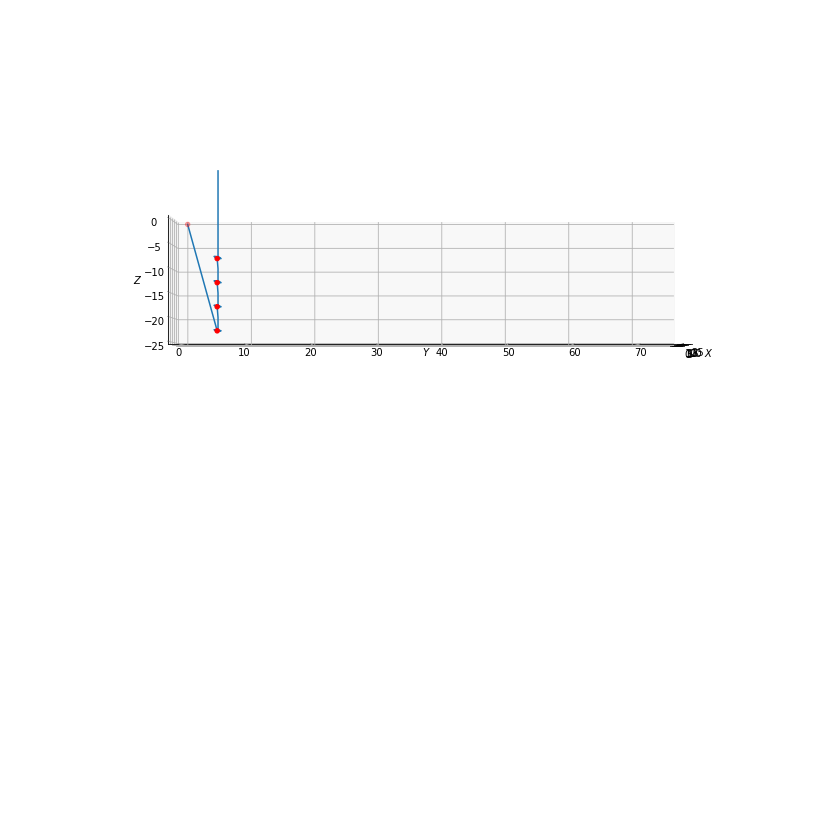

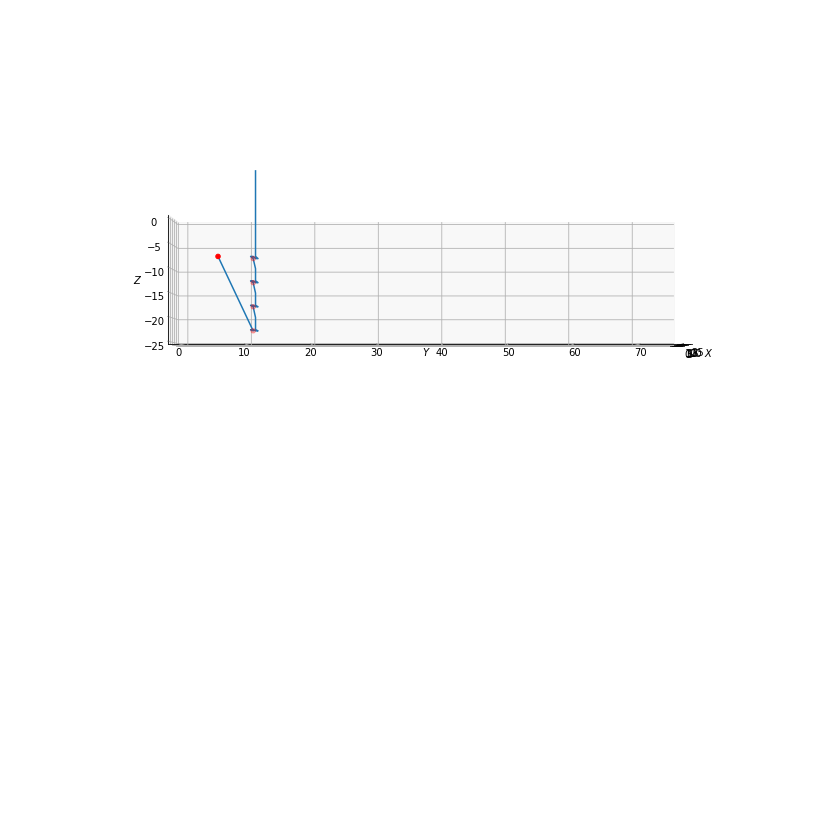

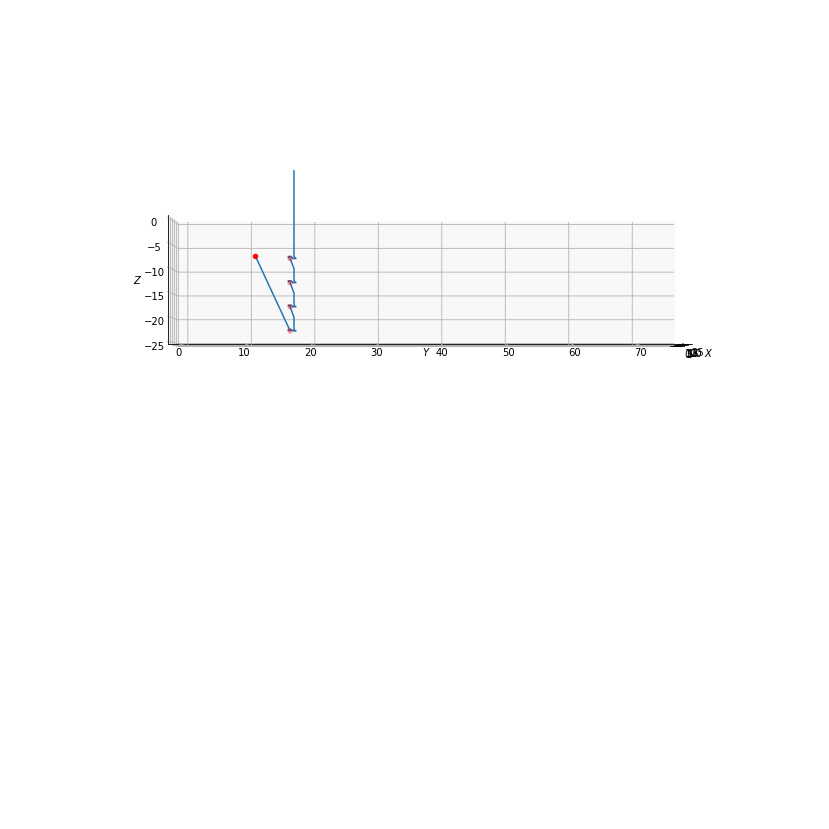

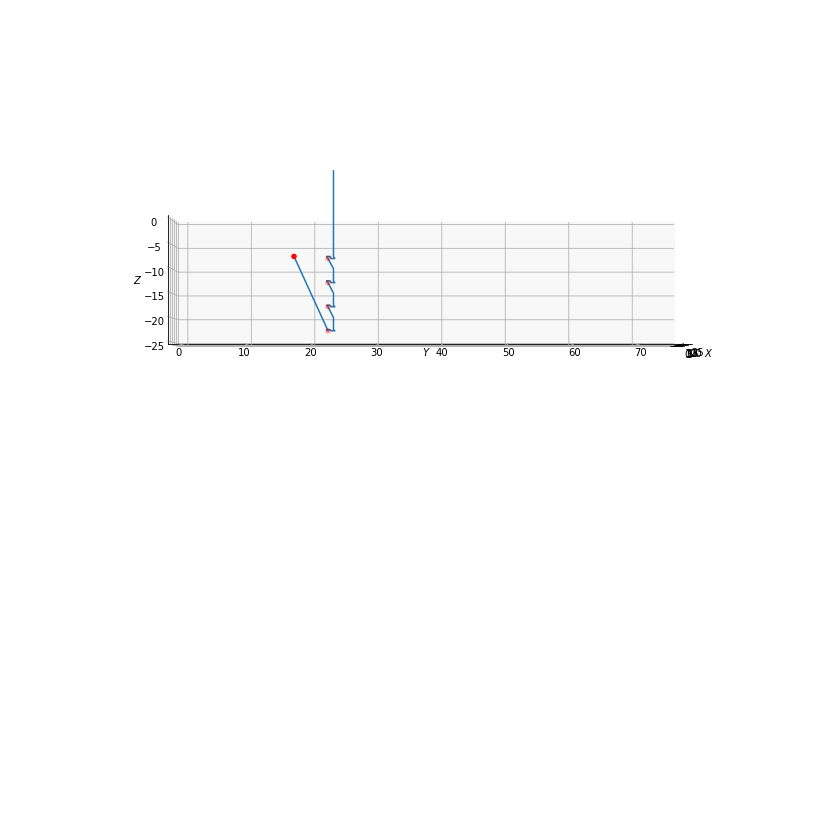

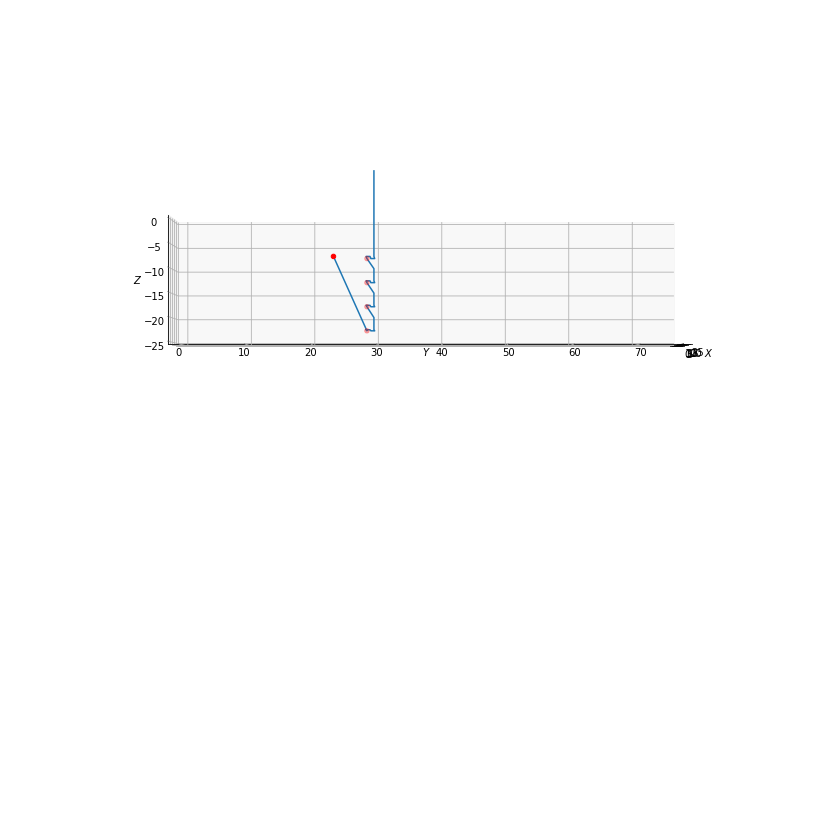

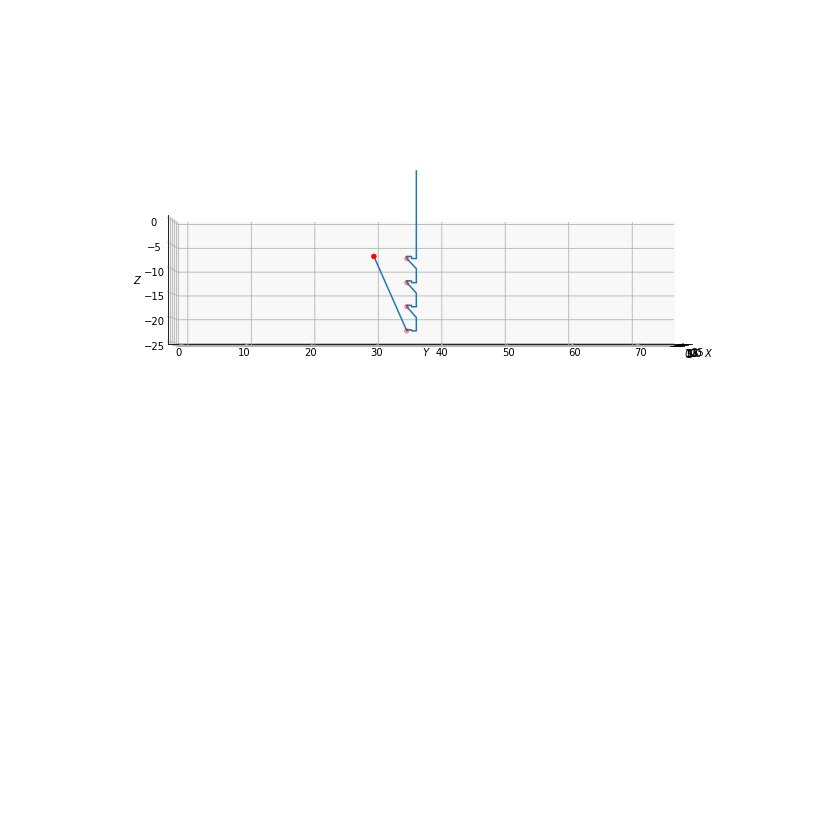

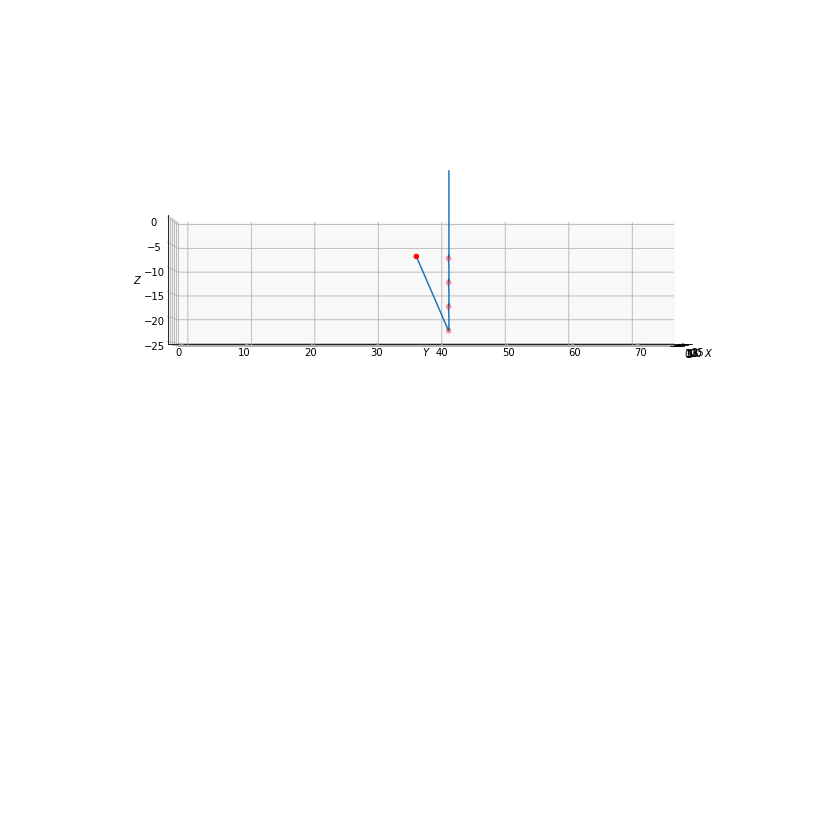

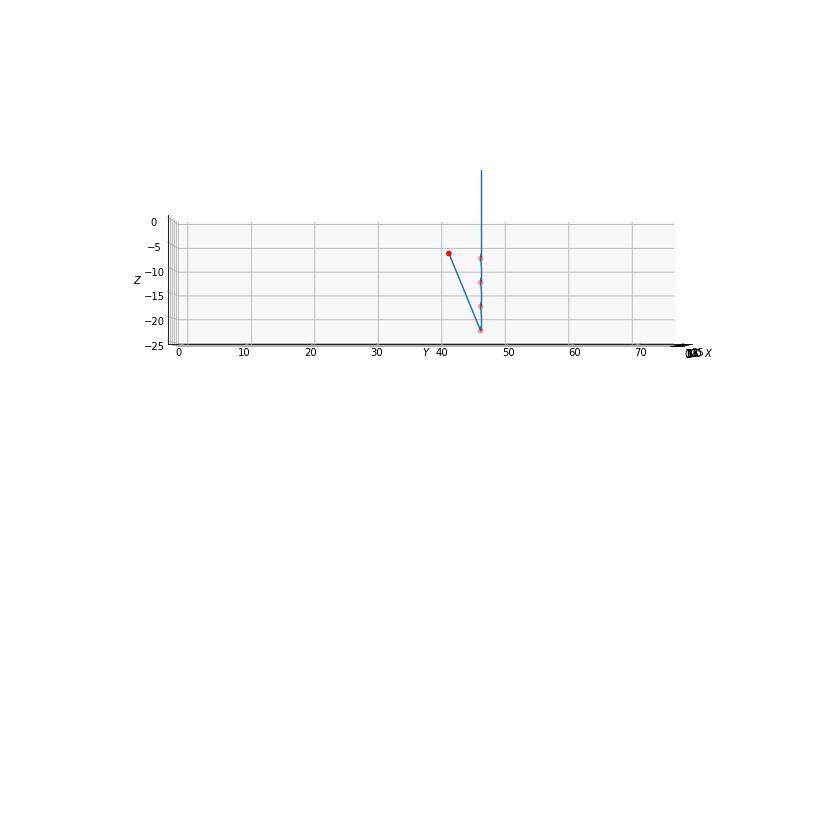

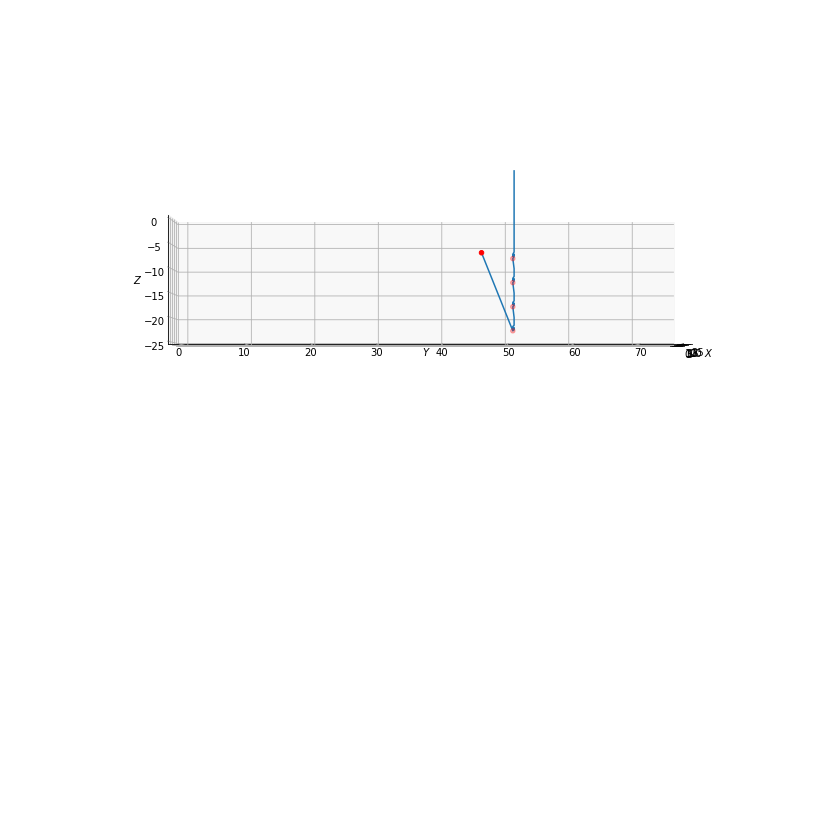

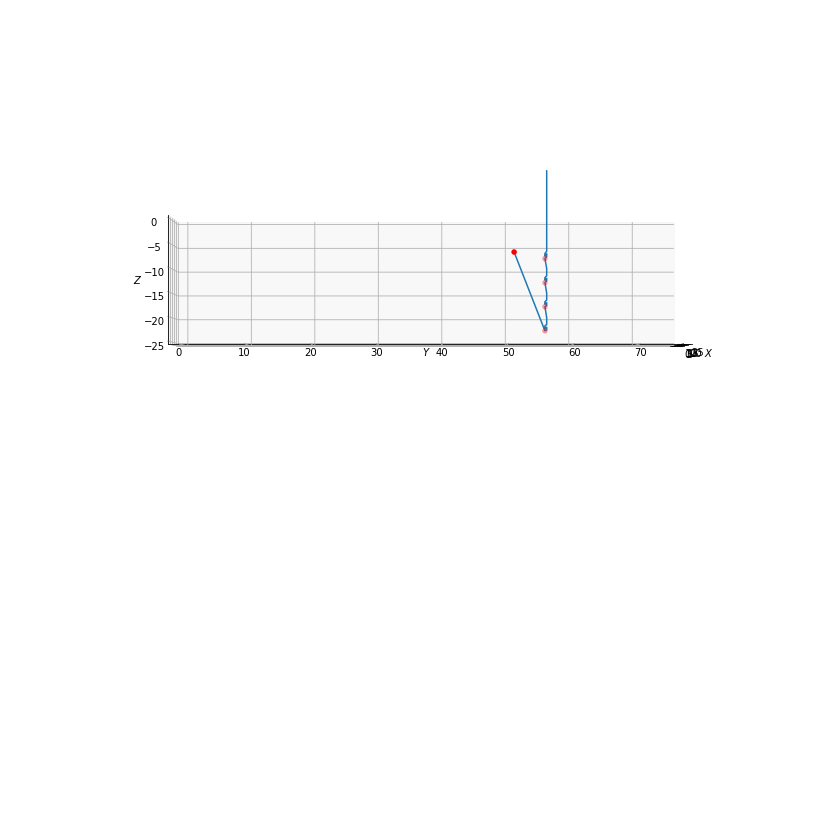

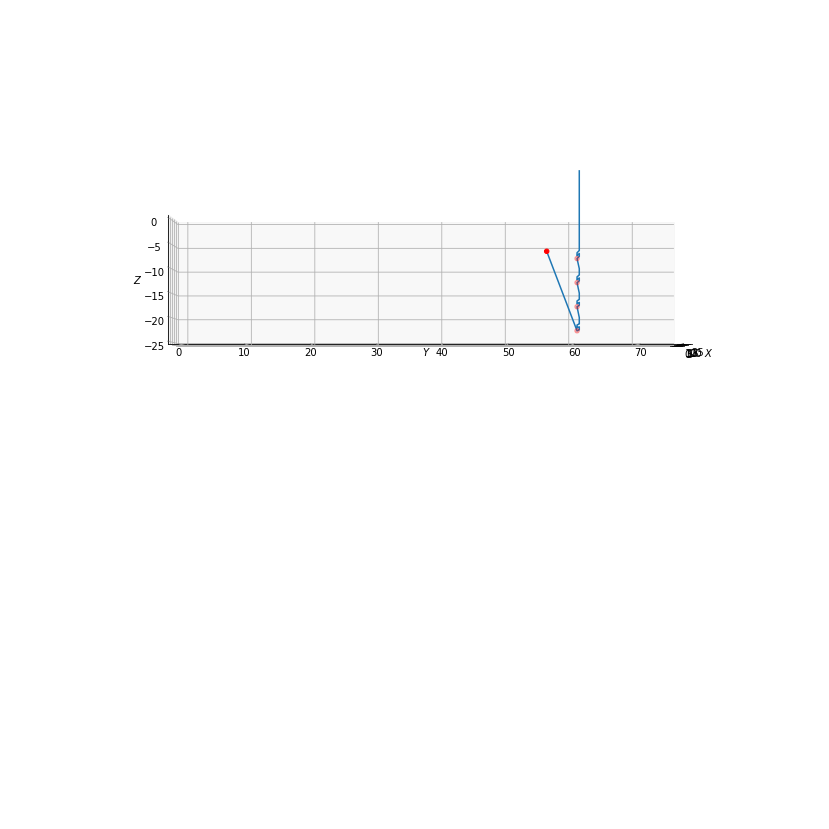

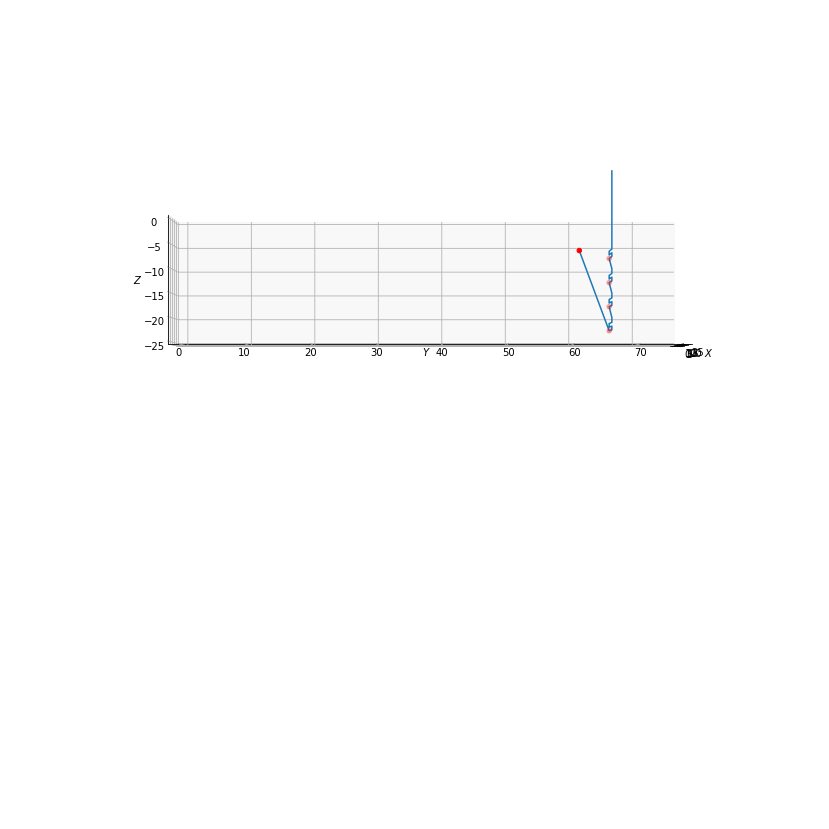

In [42]:
ylast = 0

# head-on, in plane
for shortdir in ['+y', '+z']:
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
        total.addVar('nid', 0.603)
        if i==0 and shortdir=='+y':
            total = total + sc.startingPoint(0,0,0)
        else:
            total = total + sc.startingPoint(zz.cp[0], zz.cp[1], zz.cp[2])
        total.turnOn(3)

        
        for z0frac in [0.9, 0.7, 0.5, 0.3]:
            if i==0 and shortdir=='+y':
                zz = sc.zigzag(lastPt=total, killZigs=True)
            else:
                zz = sc.zigzag(lastPt=zz1, killZigs=True)
            zz.x0 = '&slideW/2-&margin'
            zz.y0 = f'&margin+{ylast}'
            
            zz.z0 = f'-{z0frac}*&slideW'
            zz.width = f'2*&margin'
            zz.spacing1 = f'&nid*{spacing}'
            zz.spacing2 = f'&nid*{spacing}'
            zz.reps=3
            zz.mz(zz.z0)
            zz.shortdir = shortdir
            zz1 = copy.deepcopy(zz)
            total = total + zz
            total.jz(f'-{z0frac-0.1}*&slideW')
#         print(zz.floatSC(f'&margin+{ylast}'))
        ylast = zz.cp[1]
        total.turnOff(3)
        total.mz(10)
        total.printVolume()
        total.plot(ele=0, azi=0)
        total.export(os.path.join(SBPFOLDER, f'tripleLinesXS_{shortdir}_{spacing:.3f}.sbp'), [])
# print(total.convertFile('spacing'))

0.000 mL, 3 min 48 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesXSPics.sbp


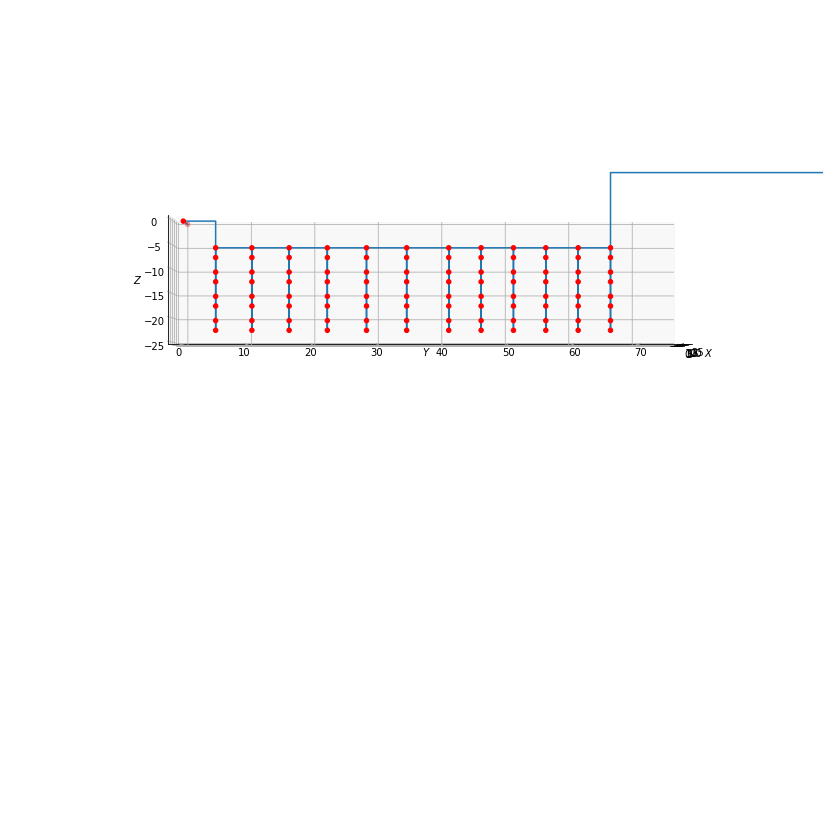

In [58]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(3)
total.setSpeeds(m=5, j=20)
ylast = 0

pic = sc.pics(channel=2, wait=2, lastPt=total)
pic.mx('&slideW/2')
pic.snap()
# head-on, in plane
for shortdir in ['+y', '+z']:
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        pic.my(f'{ylast}+&margin')
#         print(pic.floatSC(f'{ylast}+&margin'))
        for z0frac in [0.9, 0.7, 0.5, 0.3]:
            for dz in [0,2]:
                pic.mz(f'-{z0frac}*&slideW+{dz}')
                pic.snap()
        if shortdir=='+y':
            ylast = f'{pic.cp[1]}+2*&nid*{spacing}'
        else:
            ylast = f'{pic.cp[1]}'
        

total = total+pic
        
total.turnOff(3)
total.withdraw()
total.printVolume()
total.plot(ele=0, azi=0)
total.export(os.path.join(SBPFOLDER, 'tripleLinesXSPics.sbp'), [])
# print(total.convertFile('spacing'))

##### tripleLinesVert

0.026 mL, 0 min 26 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesVert_0.500.sbp
0.026 mL, 0 min 25 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesVert_0.625.sbp
0.026 mL, 0 min 25 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesVert_0.750.sbp
0.026 mL, 0 min 25 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesVert_0.875.sbp
0.026 mL, 0 min 25 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesVert_1.000.sbp
0.026 mL, 0 min 25 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesVert_1.250.sbp


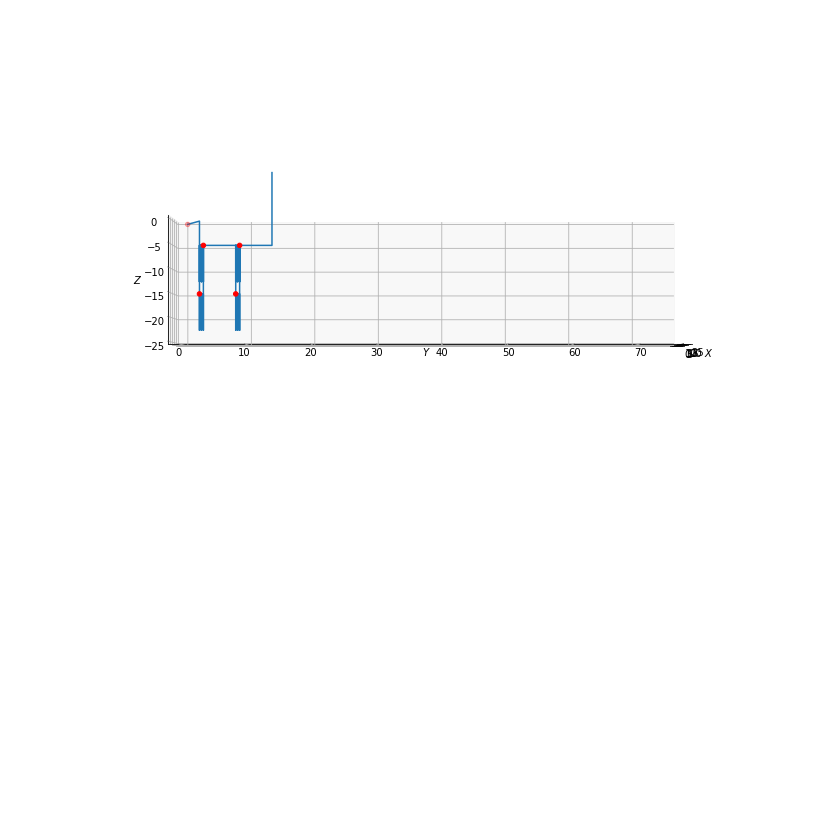

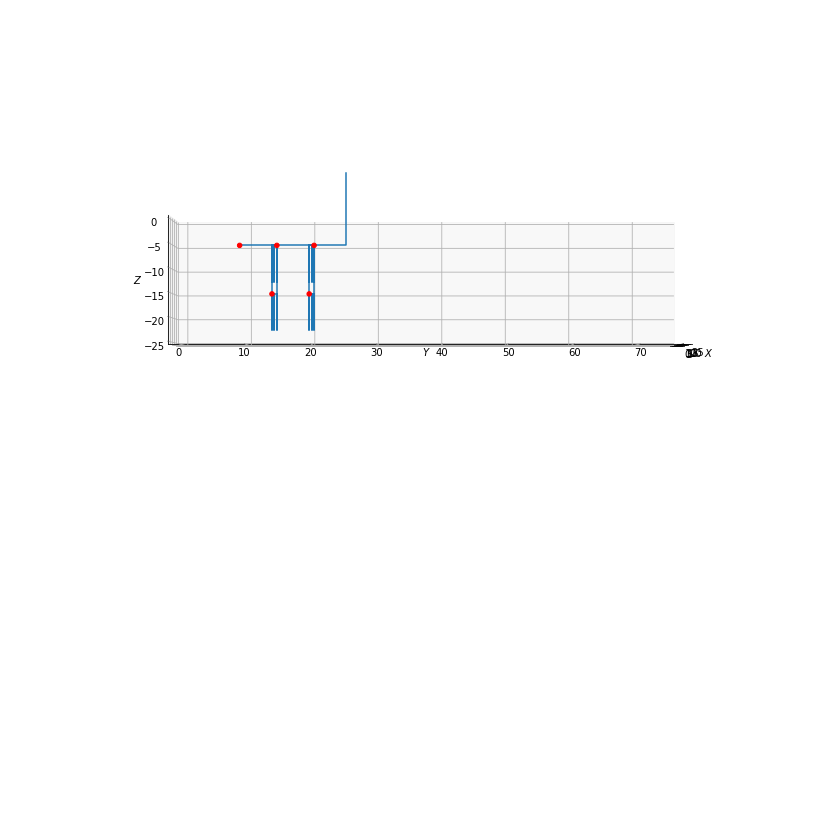

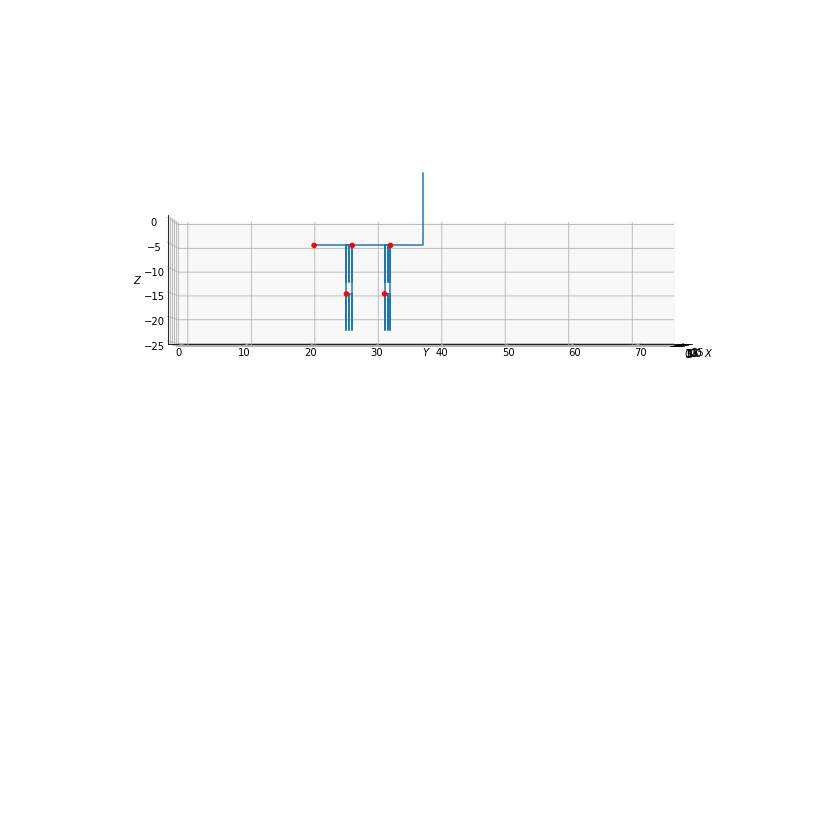

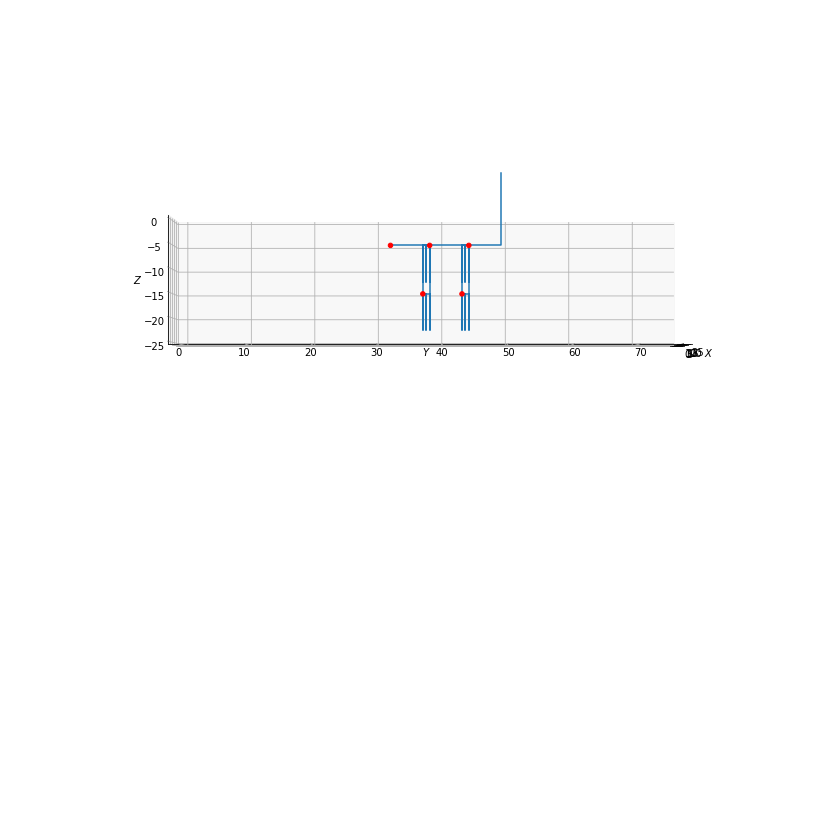

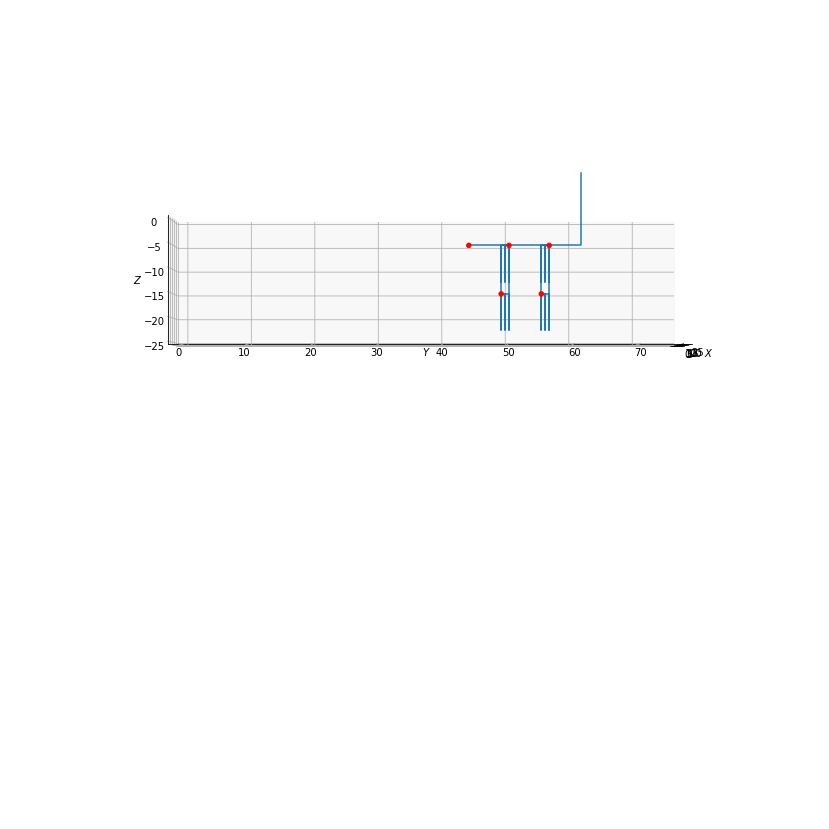

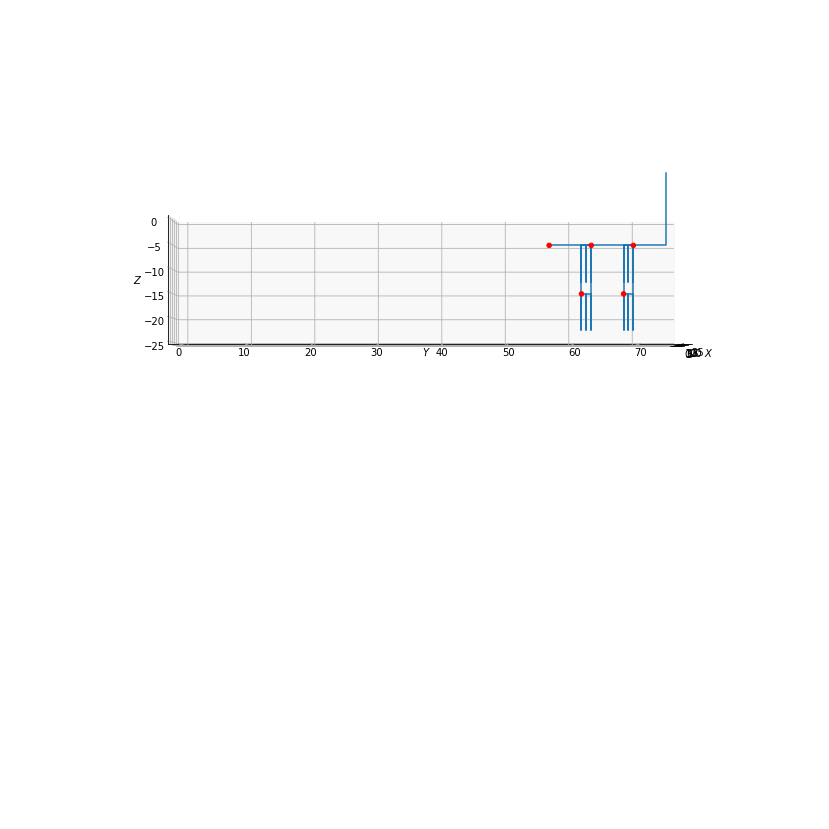

In [53]:
ylast = '&margin/2'
xmed = slideW/2
# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    total = copy.deepcopy(dv)
    total.addVar('nid', 0.603)
    if i==0:
        total = total + sc.startingPoint(0,0,0)
    else:
        total = total + sc.startingPoint(v11.cp[0], v11.cp[1], v11.cp[2])
    total.turnOn(3)
    total.j2(xmed, ylast)
    
    for j in [0,1]:
        # get 4 reps for each spacing
        for z0frac in [0.5,0]:
            v1 = sc.verts(lastPt=total)
            v1.upDownRowReps(direc='+y', p0=f'{ylast}', const=xmed, spacing=f'{spacing}*&nid', reps=3)
            v1.zmax = f'-&slideW*{z0frac}-&margin/2-&margin*{0.5-z0frac}'
            v1.zmin = f'-&slideW*{z0frac+0.5}+&margin/2-&margin*{0.5-z0frac}'
            v1.downdisp = 0
            total = total + v1
            
            
        ylast = v1.cp[1]
        ylast = sc.p(ylast, '&margin')
        total.jy(ylast)
    v11 = copy.deepcopy(v1)    
    

    total.turnOff(3)
    total.mz(10)
    total.printVolume()
    total.plot(ele=0, azi=0)
    total.export(os.path.join(SBPFOLDER, f'tripleLinesVert_{spacing:.3f}.sbp'), [])
    # print(total.convertFile('spacing'))

0.000 mL, 4 min 17 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesVertPics.sbp


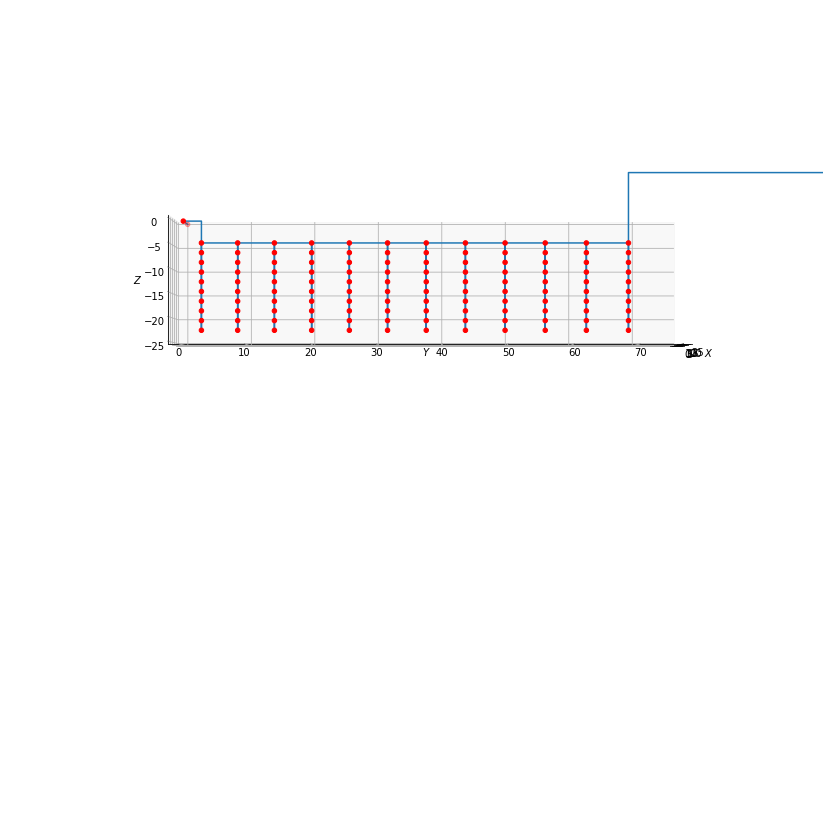

In [57]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(3)
total.setSpeeds(m=5, j=20)
ylast = '&margin/2'
pic = sc.pics(channel=2, wait=2, lastPt=total)
pic.mx('&slideW/2')
pic.snap()
# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    for j in [0,1]:
        # get 4 reps for each spacing
        pic.my(f'{ylast}+{spacing}*&nid')
        for z0frac in [0.5,0]:
            for dz in range(0, 10, 2):
                pic.mz(f'-&slideW*{z0frac+0.5}+&margin/2+{dz}-&margin*{0.5-z0frac}')
                pic.snap()
        ylast = pic.cp[1]
        ylast = sc.p(ylast, f'&margin+{spacing}*&nid')
total=total+pic

total.turnOff(3)
total.withdraw()
total.printVolume()
total.plot(ele=0, azi=0)
total.export(os.path.join(SBPFOLDER, 'tripleLinesVertPics.sbp'), [])
# print(total.convertFile('spacing'))

##### crossDoubleVert

0.021 mL, 0 min 17 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleVert_0.5_0.500.sbp
0.021 mL, 0 min 17 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleVert_0.5_0.625.sbp
0.021 mL, 0 min 17 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleVert_0.5_0.750.sbp
0.021 mL, 0 min 17 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleVert_0.5_0.875.sbp
0.021 mL, 0 min 17 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleVert_0.5_1.000.sbp
0.021 mL, 0 min 17 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleVert_0.5_1.250.sbp
0.023 mL, 0 min 23 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleVert_0_0.500.sbp
0.023 mL, 0 min 19 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleVert_0_0.625.sbp
0.023 mL, 0 min 19 s
Exported file C:\Users\lmf1\Documents\G

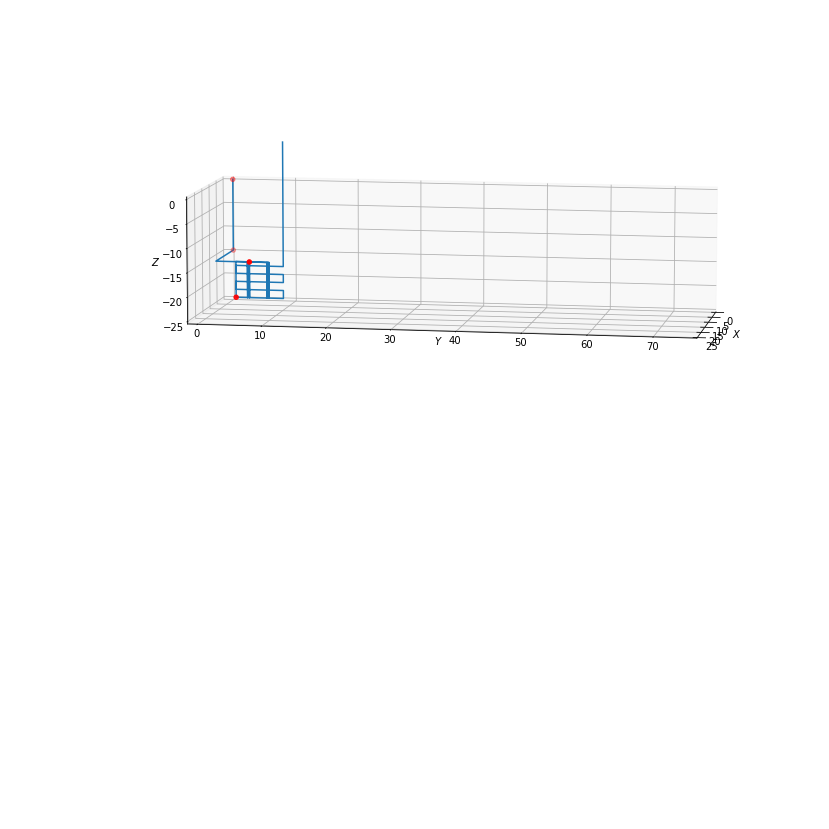

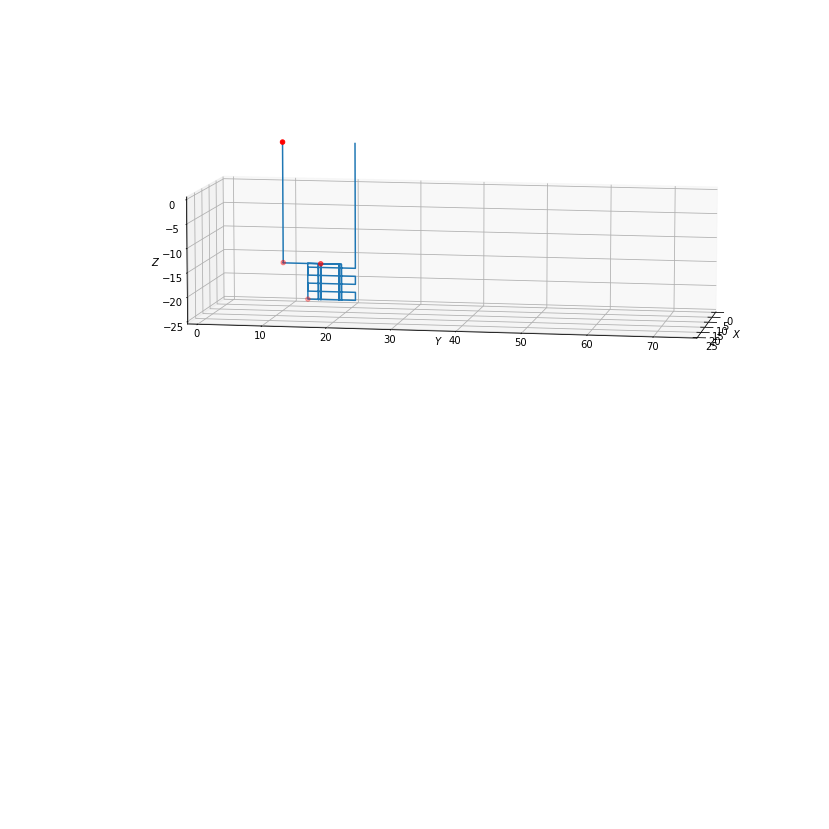

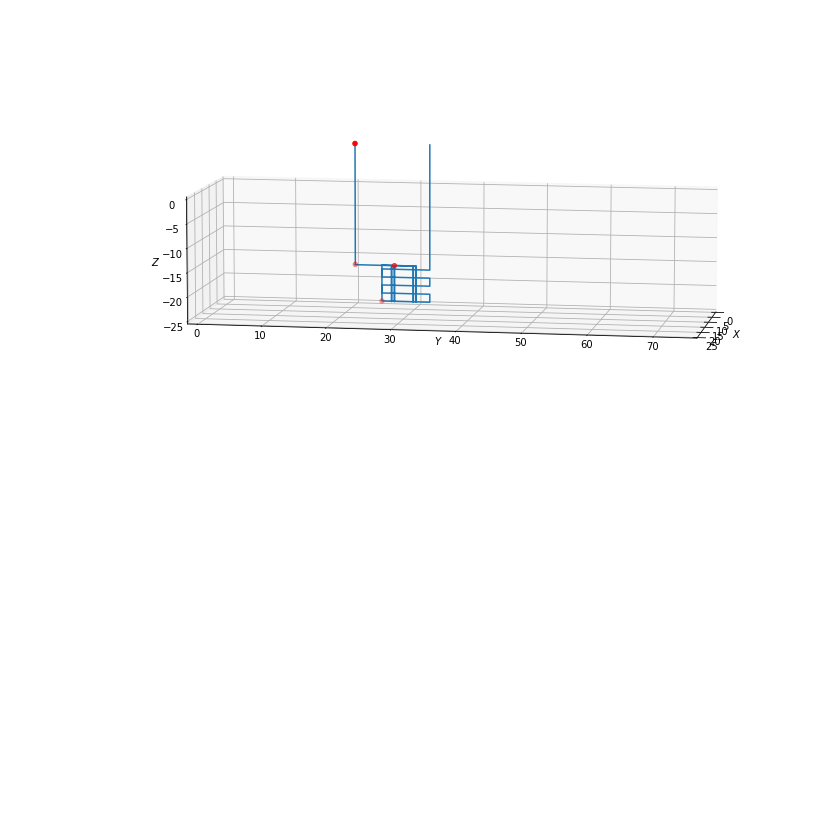

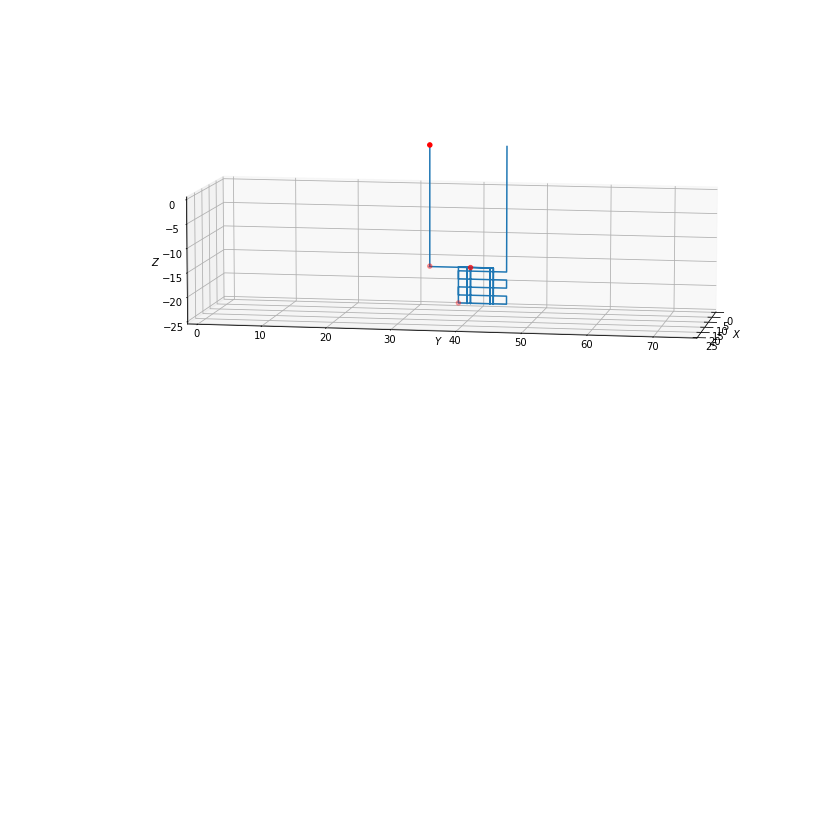

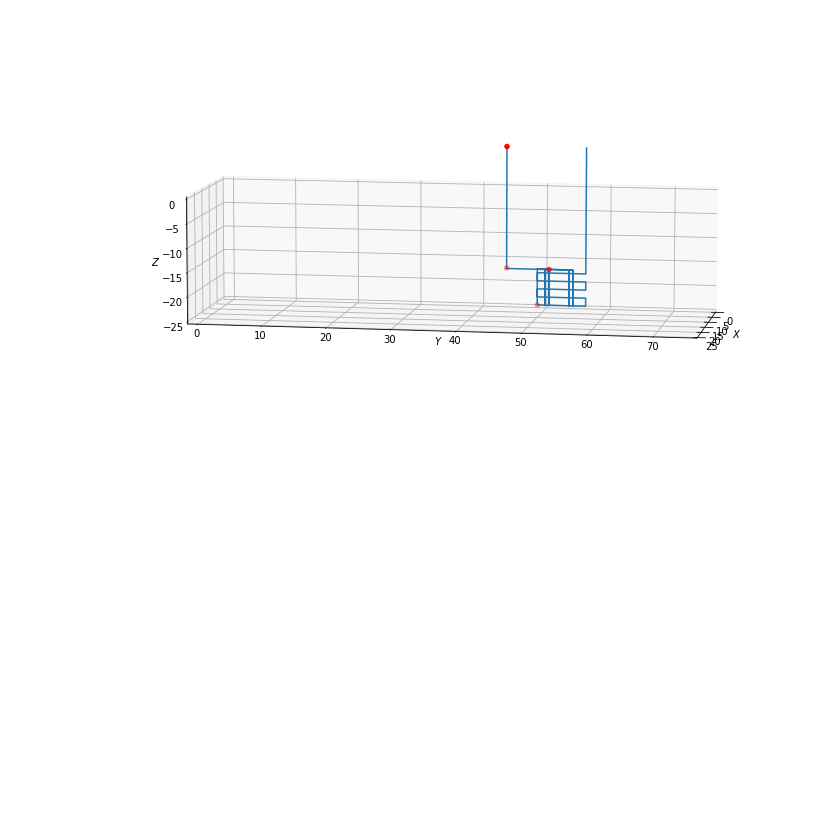

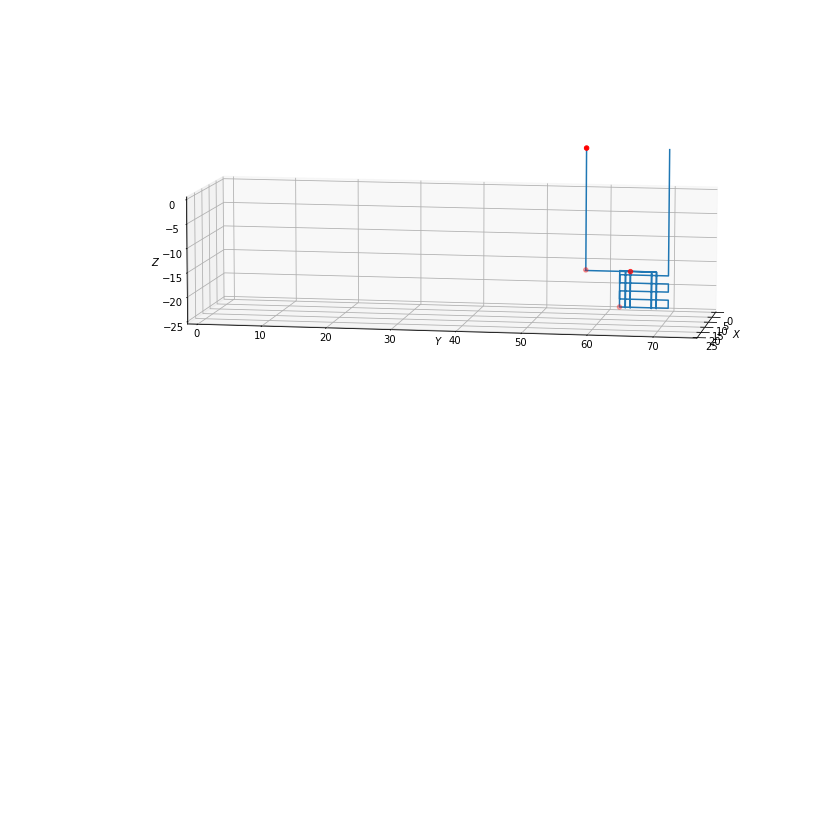

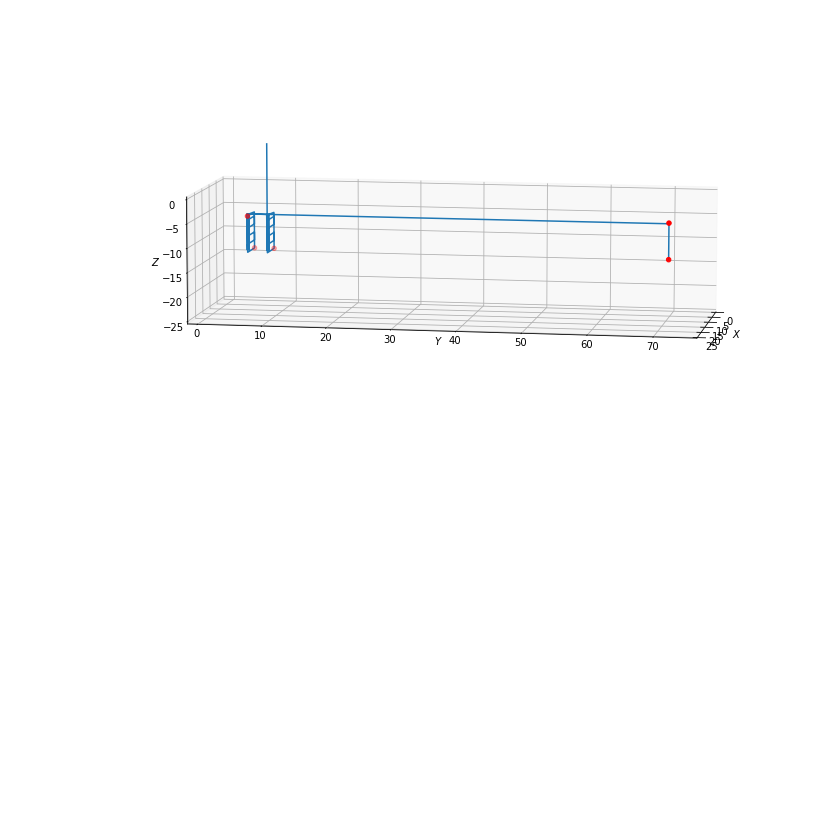

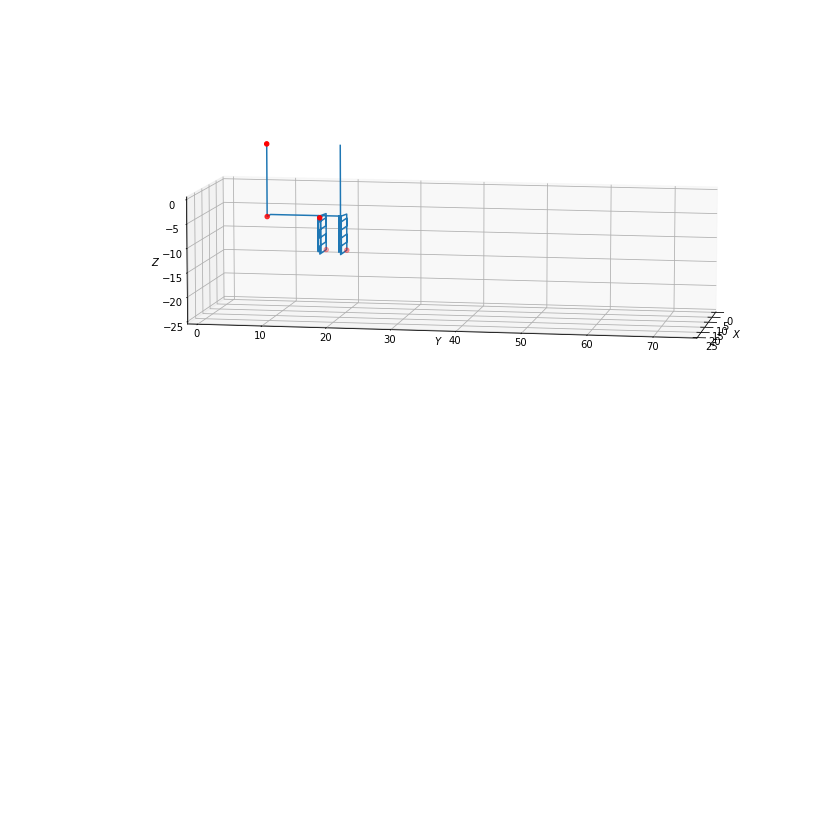

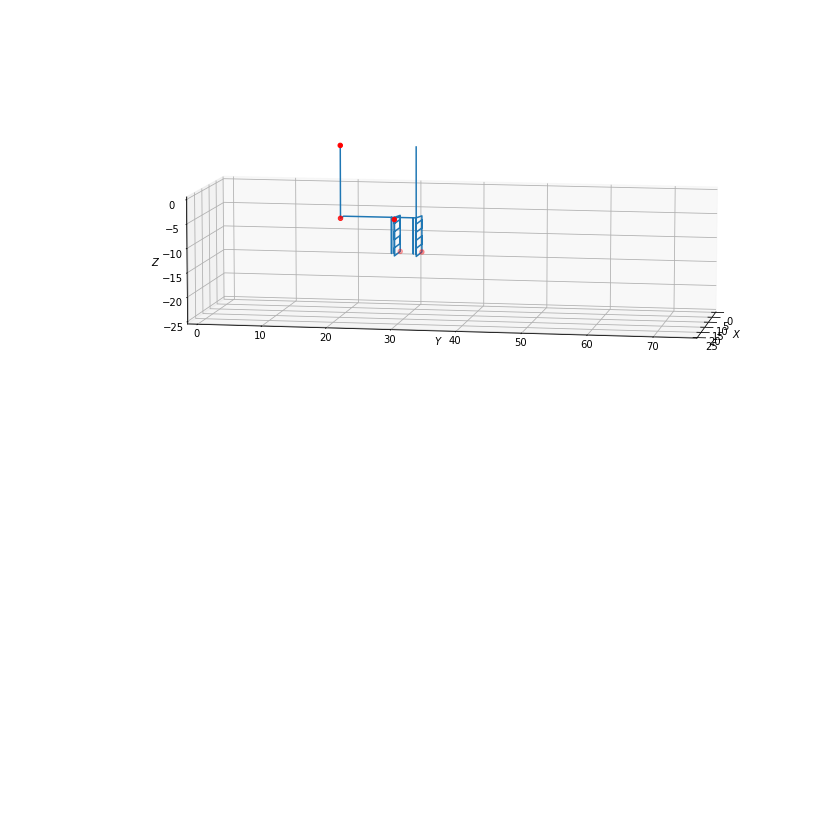

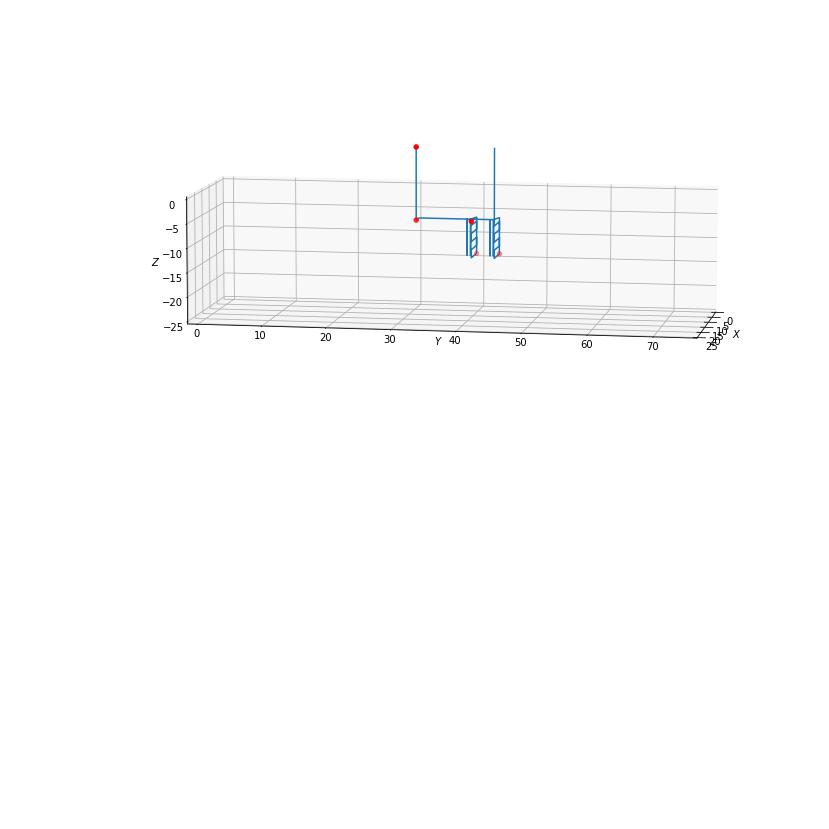

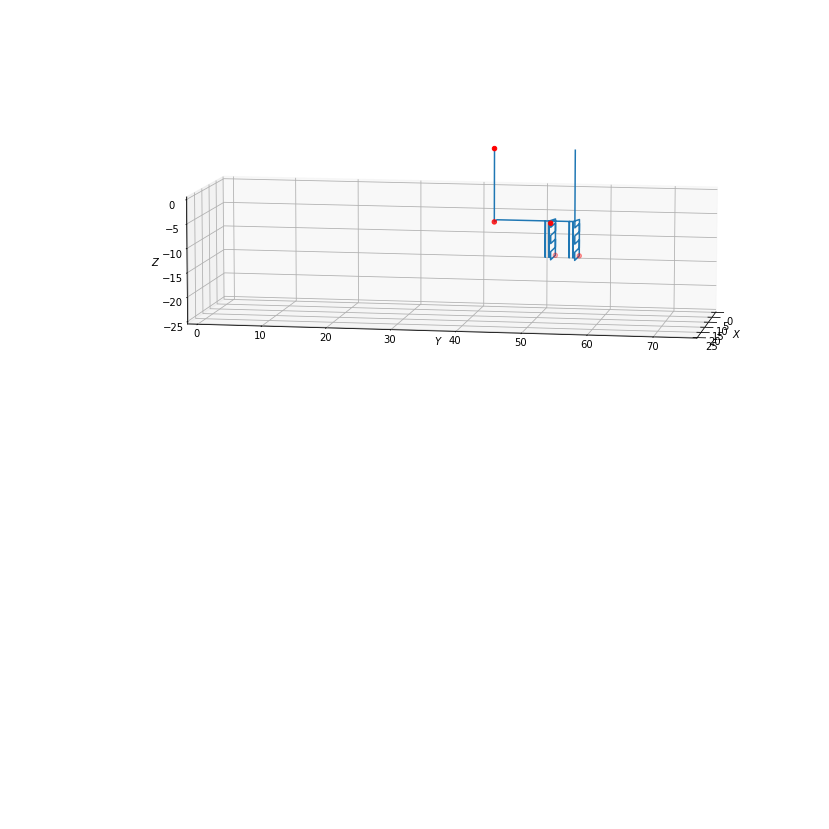

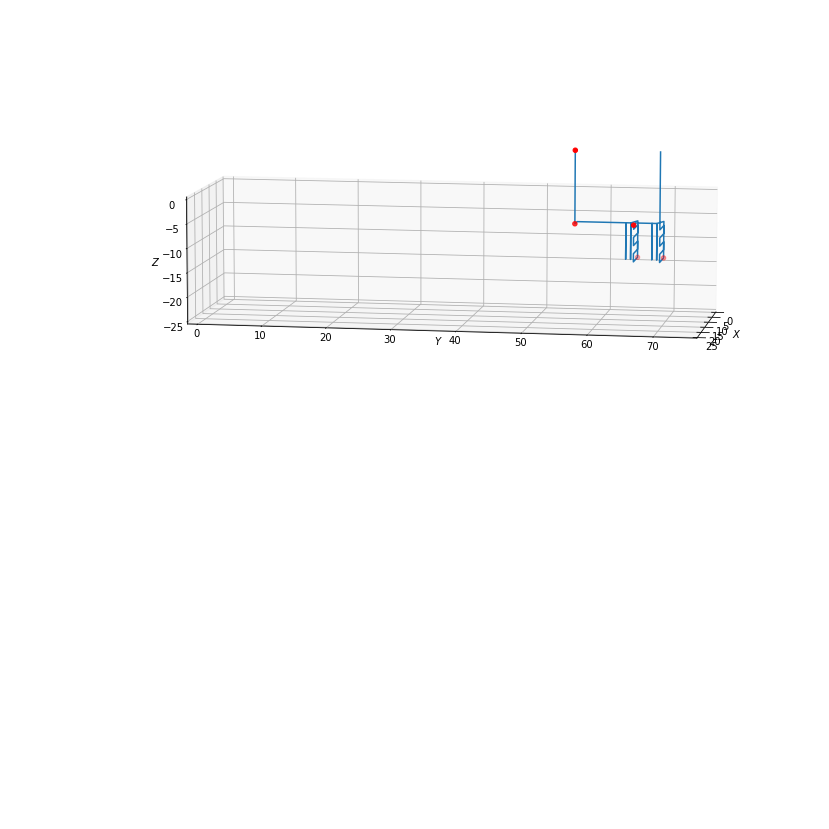

In [44]:


xmed = slideW/2
# head-on, in plane
for z0frac in [0.5, 0]:
    ylast = ['&margin','&margin']
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
        total.addVar('nid',0.603)
        if i==0 and z0frac==0.5:
            total = total + sc.startingPoint(0,0,0)
        else:
            total = total + sc.startingPoint(total1.cp[0], total1.cp[1], total1.cp[2])
        total.turnOn(3)
        for j in [0,1]:
            # get 4 reps for each spacing
            v1 = sc.verts(lastPt=total)
            v1.upDownRowReps(direc='+y', p0=f'{ylast[(j+1)%2]}', const=xmed, spacing=f'{spacing}*&nid', reps=2)
            
            if z0frac==0.5:
                v1.zmin = f'-&slideW+&margin/2'
                v1.zmax = f'-&slideW/2-&margin/2'
            else:
                v1.zmin = f'-&slideW/2'
                v1.zmax = f'-&margin'
            v1.downdisp = 0
            total = total + v1
            
            ylast[j] = v1.cp[1]
            
            if z0frac==0:
                zz4 = sc.zigzag(lastPt = total, killZigs=True)
                zz4.spacing1 = '&margin/3'
                zz4.spacing2 = '&margin/3'
                zz4.reps=5
                # draw zigzag on each pair
                zz4.width='&margin'
                zz4.x0 = sc.p(xmed, f'-0.5*&margin')
                zz4.z0 = v1.zmin
                zz4.longdir = '+x'
                zz4.shortdir = '+z'

                # first pair
                zz4.y0 = sc.p(ylast[j],f'{spacing}*&nid') # place next to double line
                total = total + zz4
            
            if j==0:
                ylast[j] = sc.p(ylast[j], f'&margin/2+{spacing}*&nid')
            else:
                ylast[j] = sc.p(ylast[j], f'&margin*1.5+{spacing}*&nid')
            
        # draw zigzag
        
        if z0frac==0.5:
            zz4 = sc.zigzag(lastPt = total, killZigs=False)
            zz4.spacing1 = '&margin/3'
            zz4.spacing2 = '&margin/3'
            zz4.reps=5
            zz4.width = '1.5*&margin'
            zz4.x0 = sc.p(xmed, f'-{spacing}*&nid') # place behind double line
            zz4.y0 = f'{ylast[0]}-&margin'
            zz4.z0 = v1.zmin
            zz4.longdir = '+y'
            zz4.shortdir = '+z'
            total = total + zz4
            
        total.turnOff(3)
        total.mz(10)
        total.printVolume()
        total.plot(ele=10, azi=10)
        total.export(os.path.join(SBPFOLDER, f'crossDoubleVert_{z0frac}_{spacing:.3f}.sbp'), [])
        # print(total.convertFile('spacing'))
        total1 = copy.deepcopy(total)
        
    total.mz(f'-&slideW*{z0frac}')
    total1 = copy.deepcopy(total)

0.000 mL, 4 min 22 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleVertPics.sbp


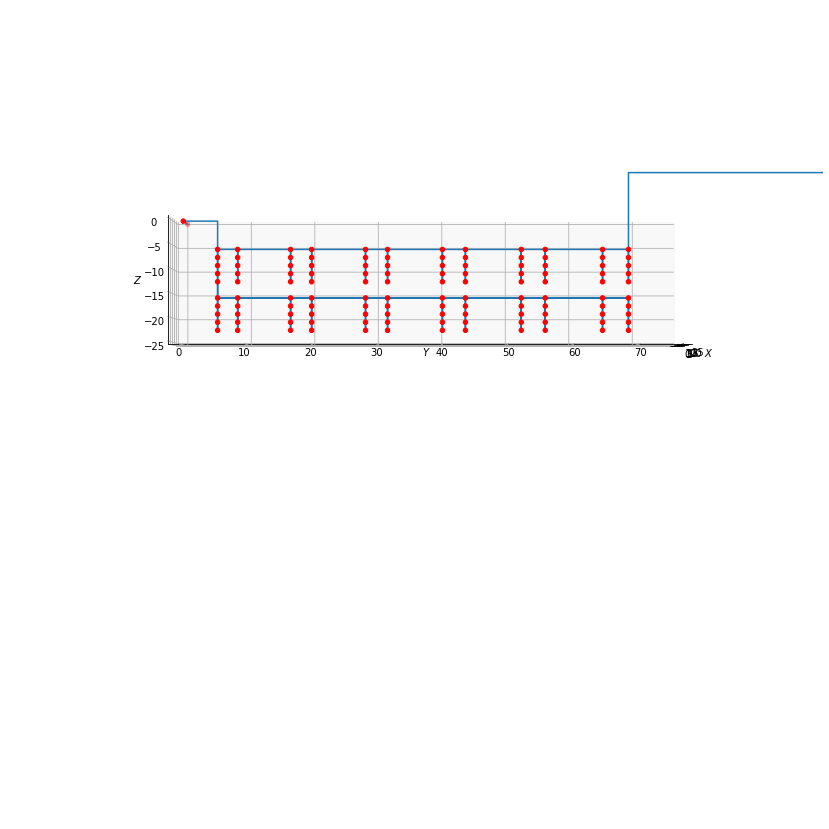

In [56]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(3)
total.setSpeeds(m=5, j=20)

pic = sc.pics(channel=2, wait=2, lastPt=total)
pic.mx('&slideW/2')
pic.snap()
# head-on, in plane
for z0frac in [0.5,0]:
    ylast = ['&margin','&margin']
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        for j in [0,1]:
            # get 4 reps for each spacing
            pic.my(f'{ylast[(j+1)%2]}+{spacing}*&nid')

            for k in range(5):
                if z0frac==0.5:
                    pic.mz(f'-&slideW*{z0frac+0.5}+&margin/2+&margin/3*{k}')
                else:
                    pic.mz(f'-&slideW*{z0frac+0.5}+&margin/3*{k}')
                pic.snap()
            ylast[j] = pic.cp[1]
            if j==0:
                ylast[j] = sc.p(ylast[j], f'&margin/2+{spacing}*&nid')
            else:
                ylast[j] = sc.p(ylast[j], f'&margin*1.5+{spacing}*&nid')
total=total+pic

total.turnOff(3)
total.withdraw()
total.printVolume()
total.plot(ele=0, azi=0)
total.export(os.path.join(SBPFOLDER, 'crossDoubleVertPics.sbp'), [])
# print(total.convertFile('spacing'))

##### crossDoubleHoriz

0.029 mL, 0 min 20 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleHoriz_0.5_0.500.sbp
0.029 mL, 0 min 20 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleHoriz_0.5_0.625.sbp
0.029 mL, 0 min 20 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleHoriz_0.5_0.750.sbp
0.029 mL, 0 min 20 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleHoriz_0.5_0.875.sbp
0.029 mL, 0 min 20 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleHoriz_0.5_1.000.sbp
0.029 mL, 0 min 20 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleHoriz_0.5_1.250.sbp
0.027 mL, 0 min 25 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleHoriz_0_0.500.sbp
0.027 mL, 0 min 19 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleHoriz_0_0.625.sbp
0.027 mL, 0 min 19 s
Exported file C:\Users\lmf1\Doc

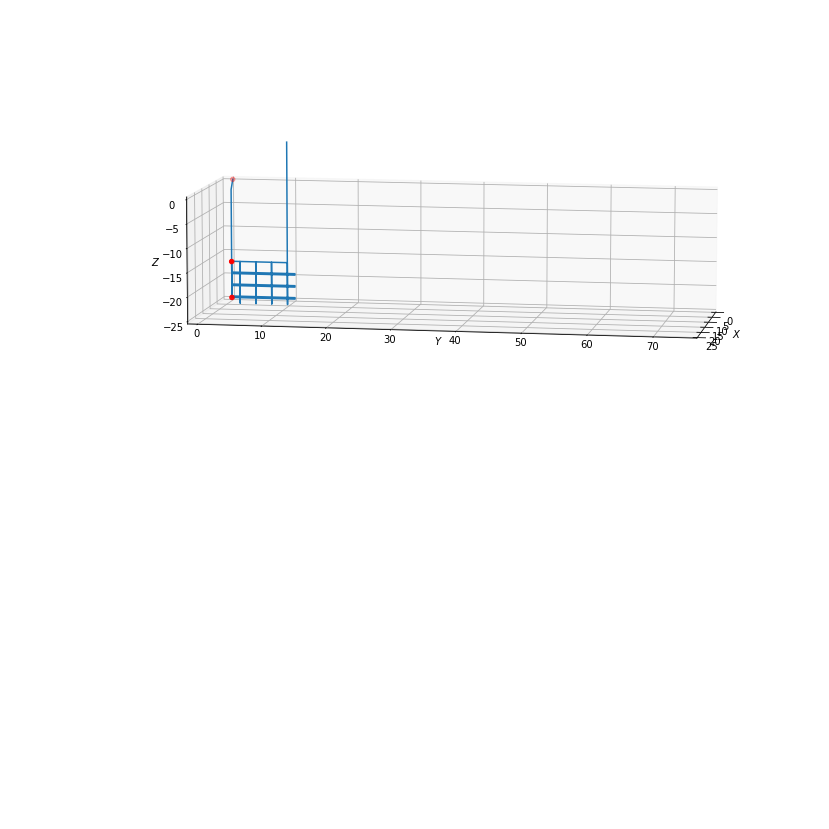

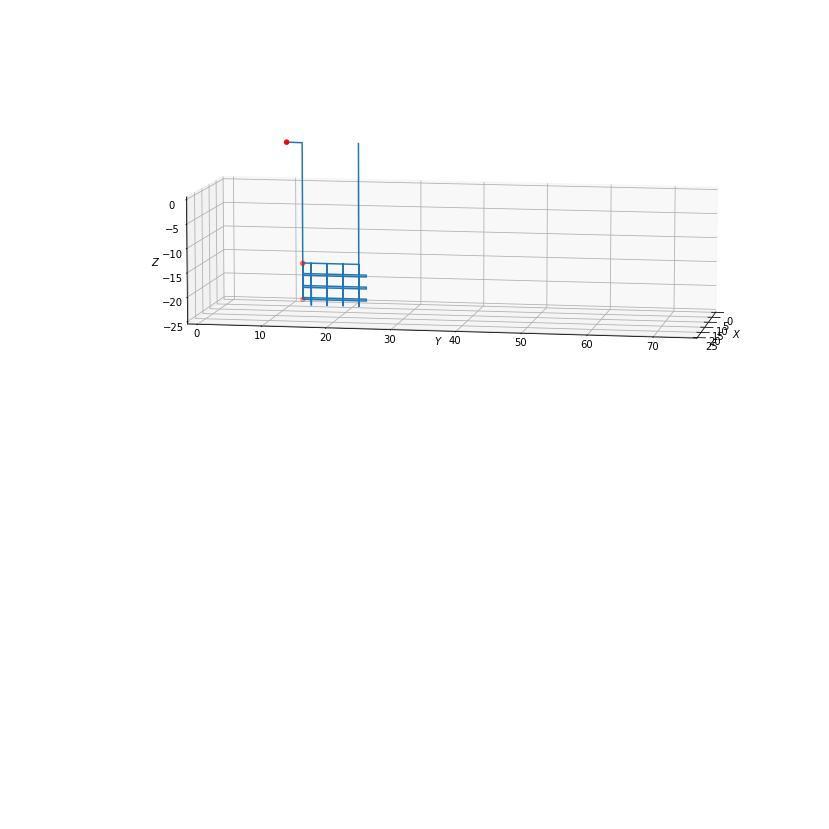

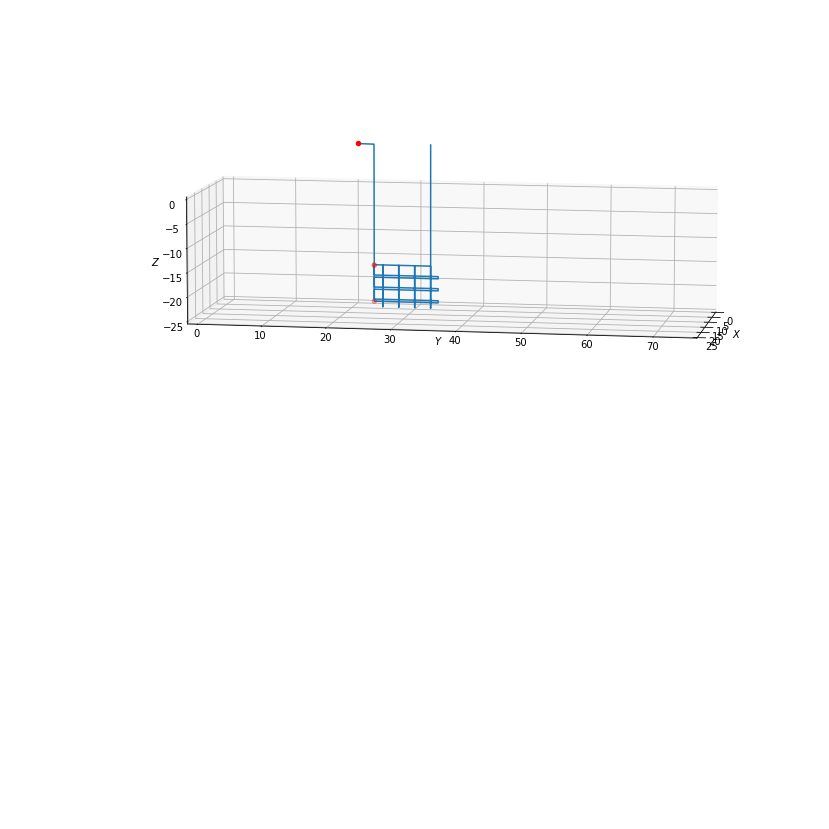

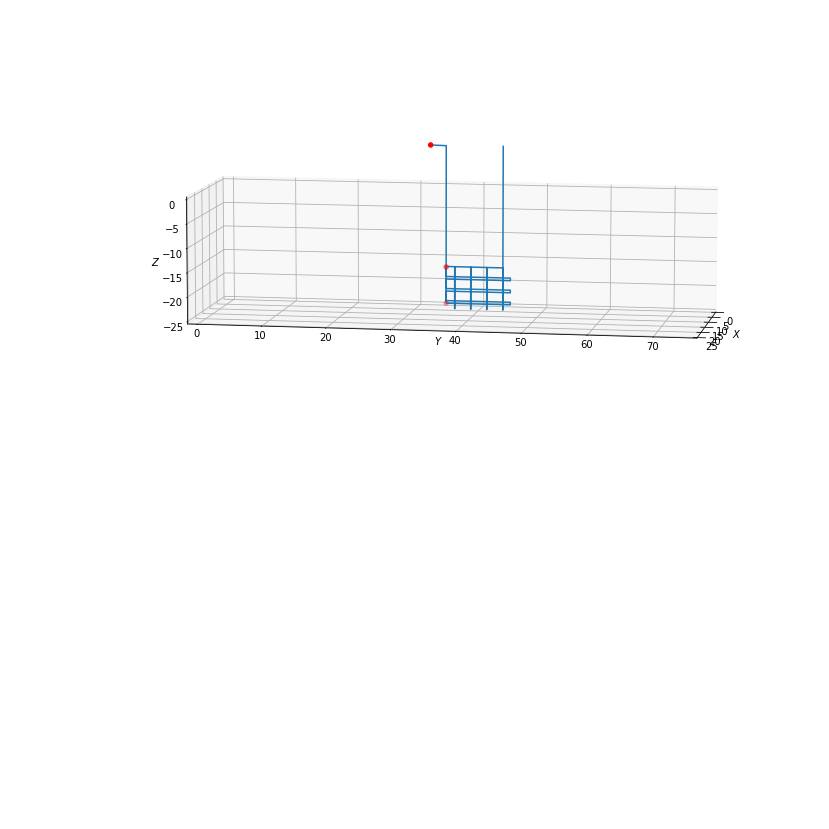

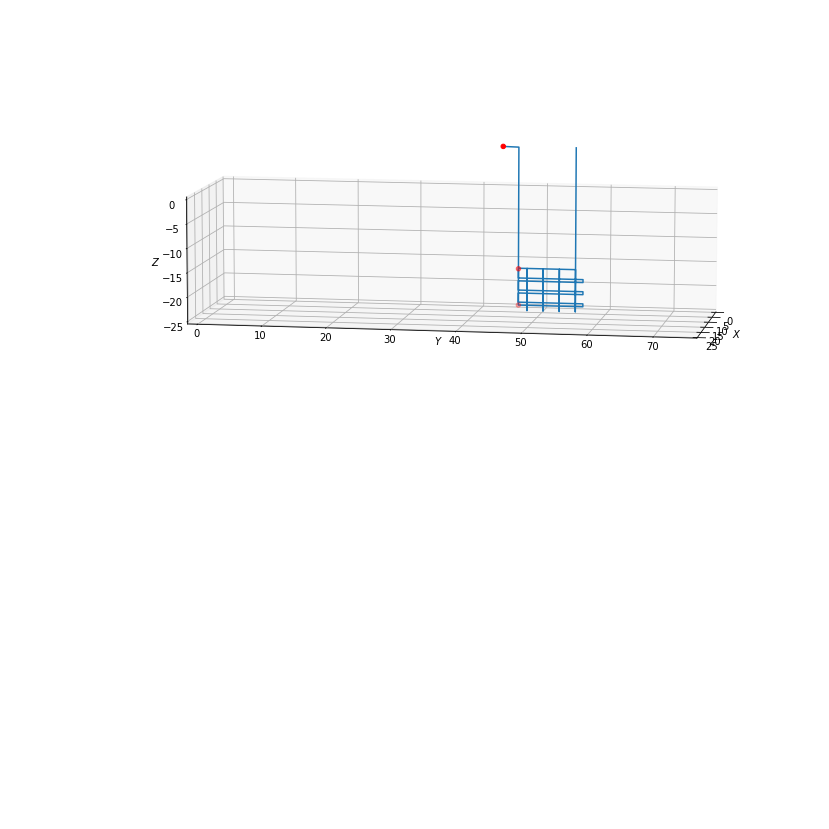

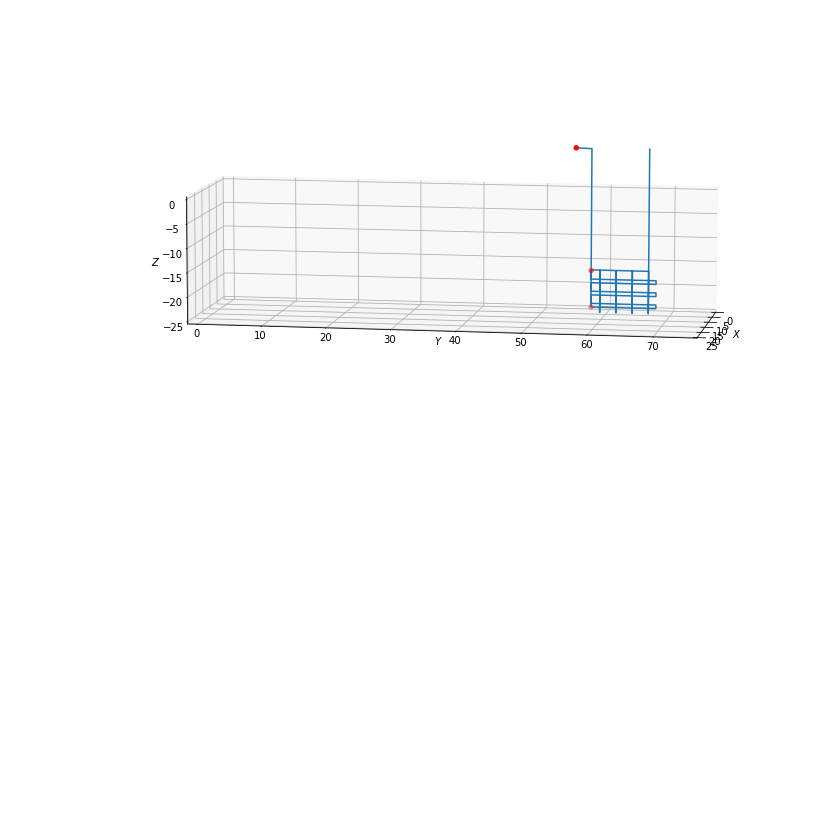

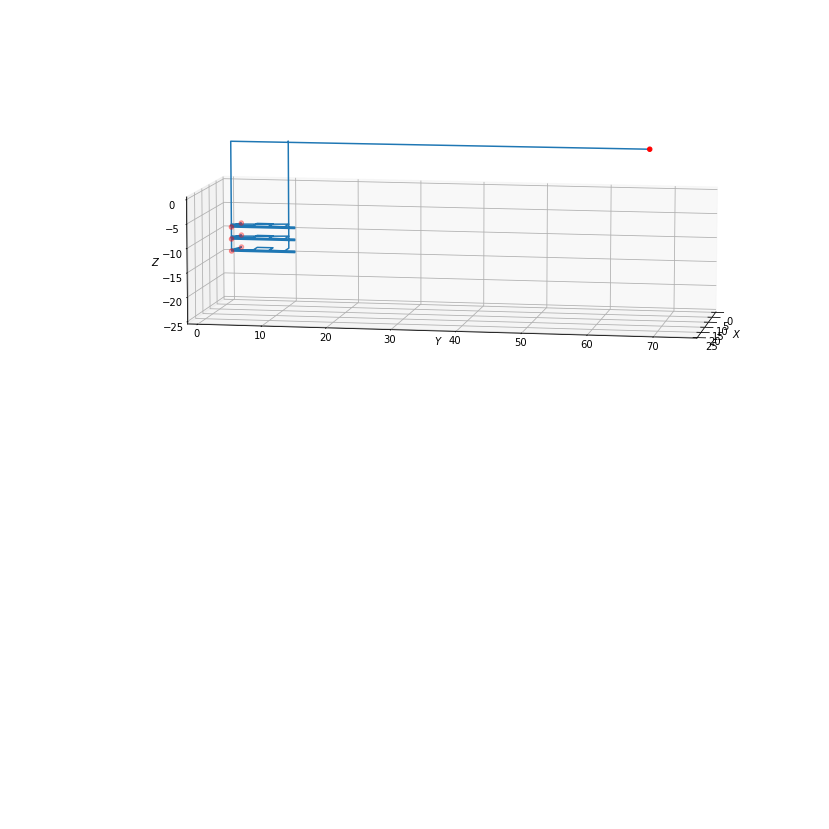

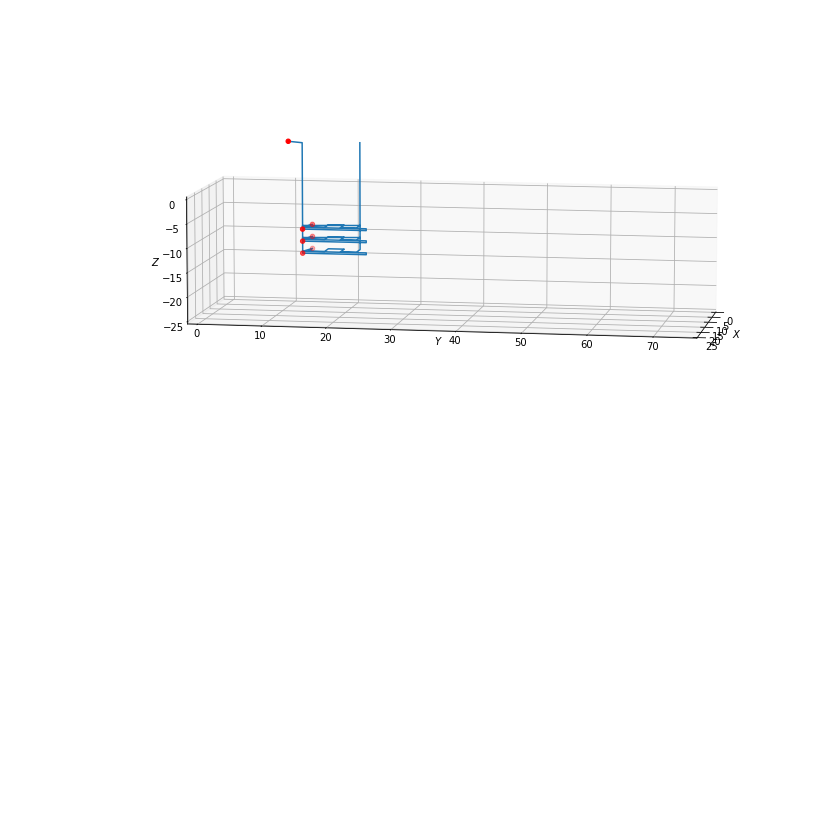

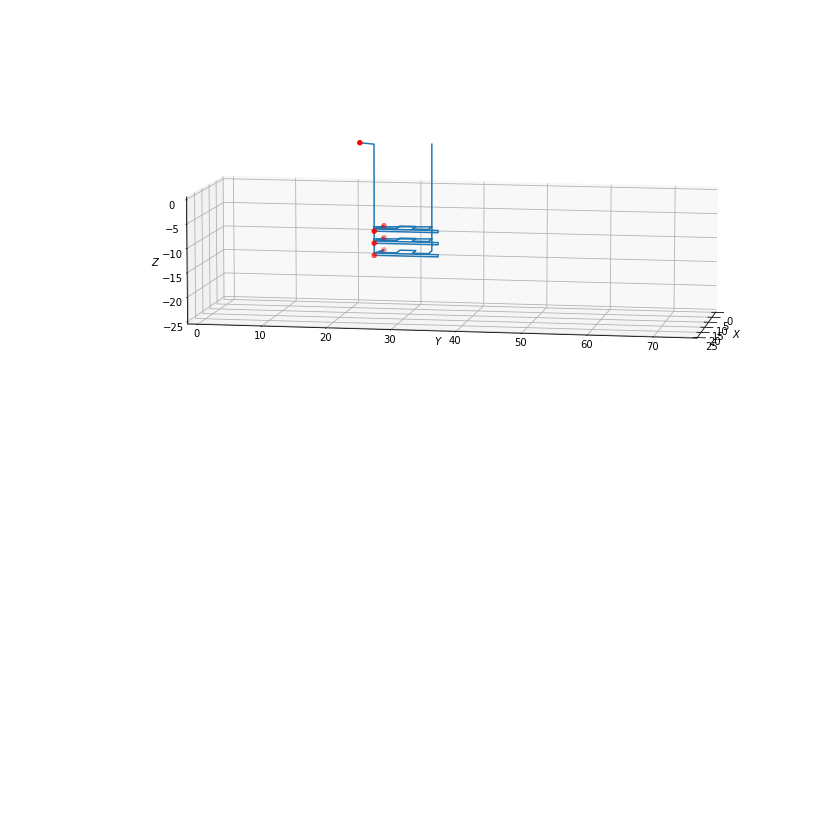

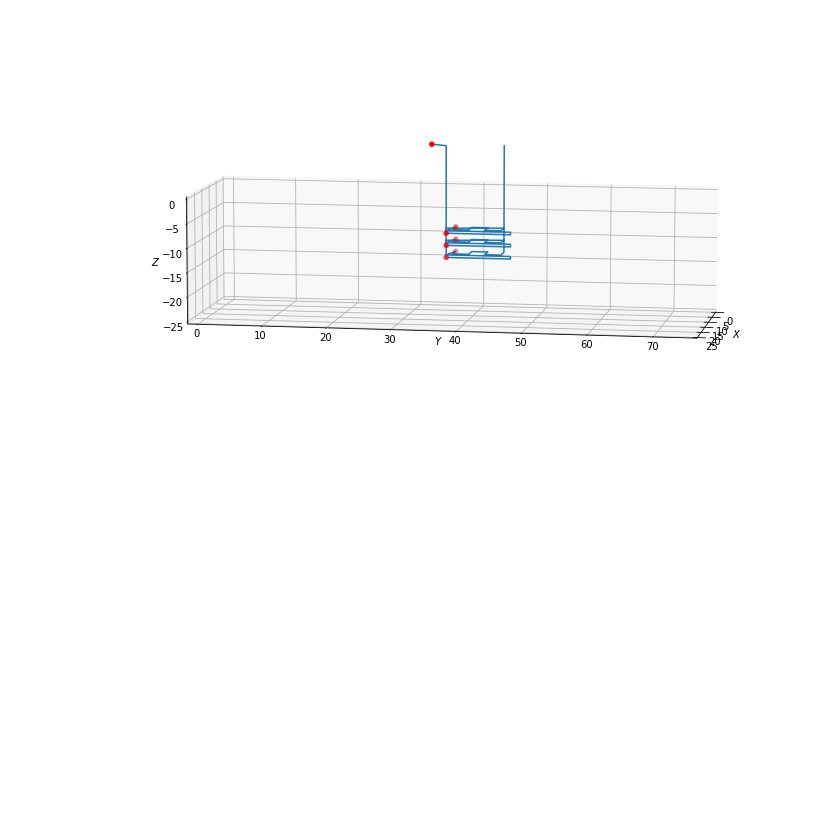

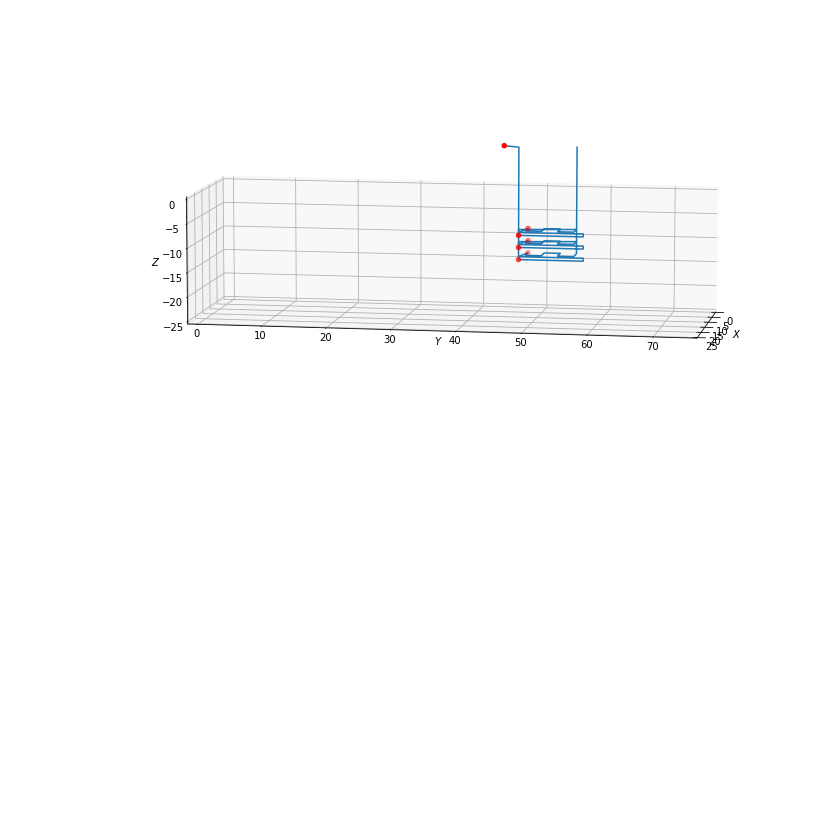

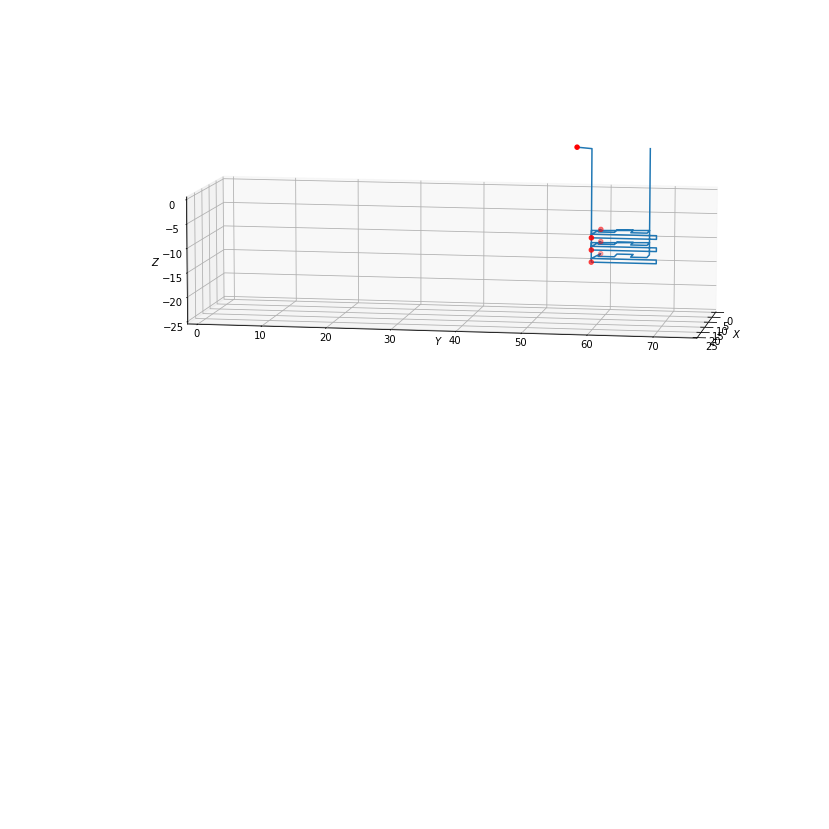

In [59]:


xmed = slideW/2
# head-on, in plane
for z0frac in [0.5,0]:
    ylast = '&margin/2'
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
        total.addVar('nid',0.603)
        if i==0 and z0frac==0.5:
            total = total + sc.startingPoint(0,0,0)
        else:
            total = total + sc.startingPoint(total1.cp[0], total1.cp[1], total1.cp[2])
        total.turnOn(3)
        if z0frac==0.5:
            # bottom: double zigzag, then verts
            zz4 = sc.zigzag(lastPt = total, killZigs=False)
            zz4.spacing2 = f'{spacing}*&nid'
            zz4.spacing1 = f'&margin/2-{spacing}*&nid'
            zz4.width='2*&margin'
            zz4.x0 = xmed
            zz4.longdir = '+y'
            zz4.shortdir = '+z'
            zz4.y0 = ylast
            zz4.reps=6
            zz4.z0 = f'-&slideW*(0.5+{z0frac})+&margin/2'
            total = total + zz4
        else:
            for k in range(3):
                zz4 = sc.zigzag(lastPt = total, killZigs=True)
                zz4.spacing2 = f'{spacing}*&nid'
                zz4.spacing1 = f'&margin/2-{spacing}*&nid'
                zz4.width='2*&margin'
                zz4.x0 = xmed
                zz4.longdir = '+y'
                zz4.shortdir = '+z'
                zz4.y0 = ylast
                zz4.reps = 2
                zz4.z0 = sc.p(sc.p(f'-&slideW*(0.5+{z0frac})', sc.t(k, zz4.spacing1)), sc.t((k-1), zz4.spacing2))
                total = total+zz4
                # zag across
                zz = sc.zigzag(lastPt=total, killZigs=True)
                zz.x0 = f'{xmed}-&margin*0.3'
                zz.y0 = f'{zz4.cp[1]}+&margin/4'
                zz.z0 = f'{zz4.cp[2]}+{spacing}*&nid'
                zz.width='&margin*0.6'
                zz.spacing1 = f'&margin/2'
                zz.spacing2 = f'&margin/2'
                zz.reps=4
                zz.mz(zz.z0)
                zz.shortdir = '+y'
                zz.longdir='+x'
                total = total + zz
                total.mz(sc.p(zz.z0,'&margin/2'))
                
            
        # draw zigzag on each pair
        
        
        ylast = sc.p(zz4.cp[1],'&margin*2.25')
        if z0frac==0.5:
            v1 = sc.verts(lastPt=total)
            v1.upDownRowReps(direc='+y', p0=sc.p('&margin/4', zz4.cp[1]), const=sc.p(xmed, f'-{spacing}*&nid'), spacing='&margin/2', reps=4)
            v1.zmax = f'-&slideW*{z0frac}-&margin/2'
            v1.zmin = f'-&slideW*{z0frac+0.5}+&margin/4'
            v1.downdisp = 0
            total = total + v1
            
        total.turnOff(3)
        total.mz(10)
        total.printVolume()
        total.plot(ele=10, azi=10)
        total.export(os.path.join(SBPFOLDER, f'crossDoubleHoriz_{z0frac}_{spacing:.3f}.sbp'), [])
        total1 = copy.deepcopy(total)
        
    total.mz(f'-&slideW*{z0frac}')


# print(total.convertFile('spacing'))

0.000 mL, 5 min 19 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\crossDoubleHorizPics.sbp


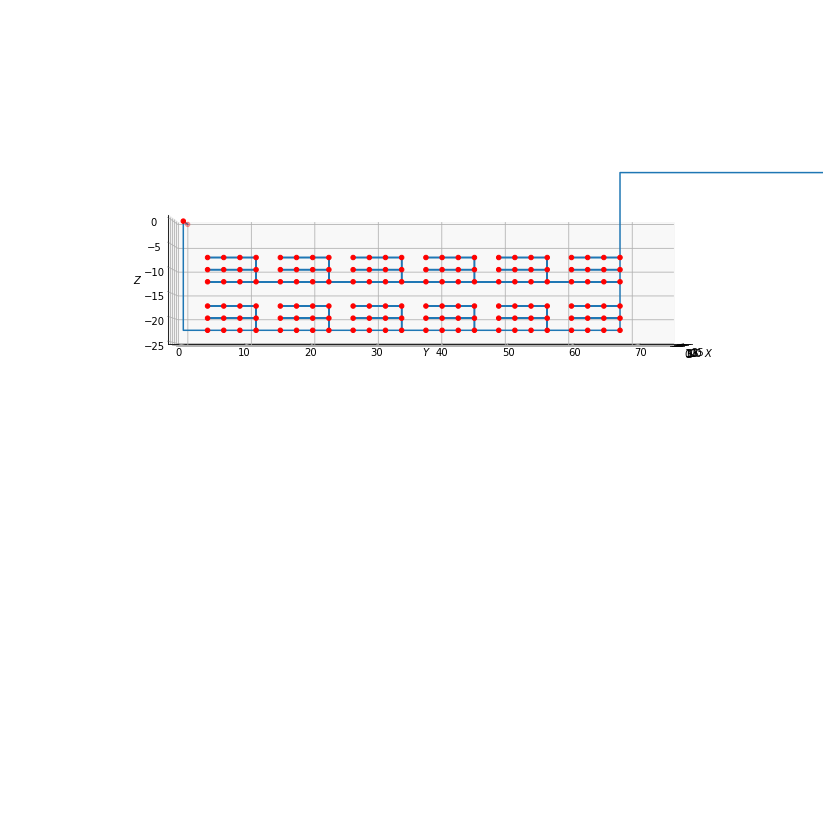

In [55]:
total = copy.deepcopy(dv)
total.addVar('nid',0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(3)
total.setSpeeds(m=5, j=20)
xmed = slideW/2
pic = sc.pics(channel=2, wait=2, lastPt=total)
pic.mx('&slideW/2')
pic.snap()
# head-on, in plane
for z0frac in [0.5, 0]:
    ylast = '&margin/2'
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        for k in range(3):
            if z0frac==0.5:
                pic.mz(f'-&slideW+&margin/2+{k}*&margin/2')
            else:
                pic.mz(f'-&slideW*0.5+{k}*&margin/2')
            for j in range(4):
                pic.my(sc.p(ylast,f'&margin/2*{j}+&margin/4'))
                pic.snap()
        ylast = sc.p(pic.cp[1],'&margin*0.5')

total = total+pic
total.turnOff(3)
total.withdraw()
total.printVolume()
total.plot(ele=0, azi=0)
total.export(os.path.join(SBPFOLDER, 'crossDoubleHorizPics.sbp'), [])
# print(total.convertFile('spacing'))

##### tripleLinesHoriz

0.026 mL, 0 min 19 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesHoriz_0.500.sbp
0.026 mL, 0 min 19 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesHoriz_0.625.sbp
0.026 mL, 0 min 19 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesHoriz_0.750.sbp
0.026 mL, 0 min 19 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesHoriz_0.875.sbp
0.026 mL, 0 min 19 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesHoriz_1.000.sbp
0.026 mL, 0 min 19 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesHoriz_1.250.sbp


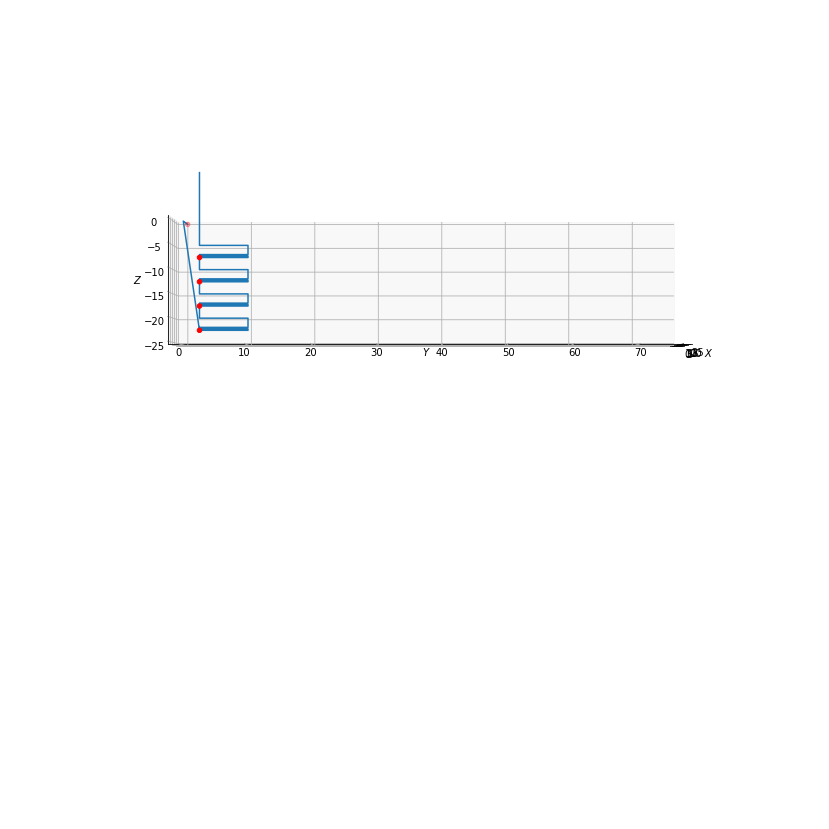

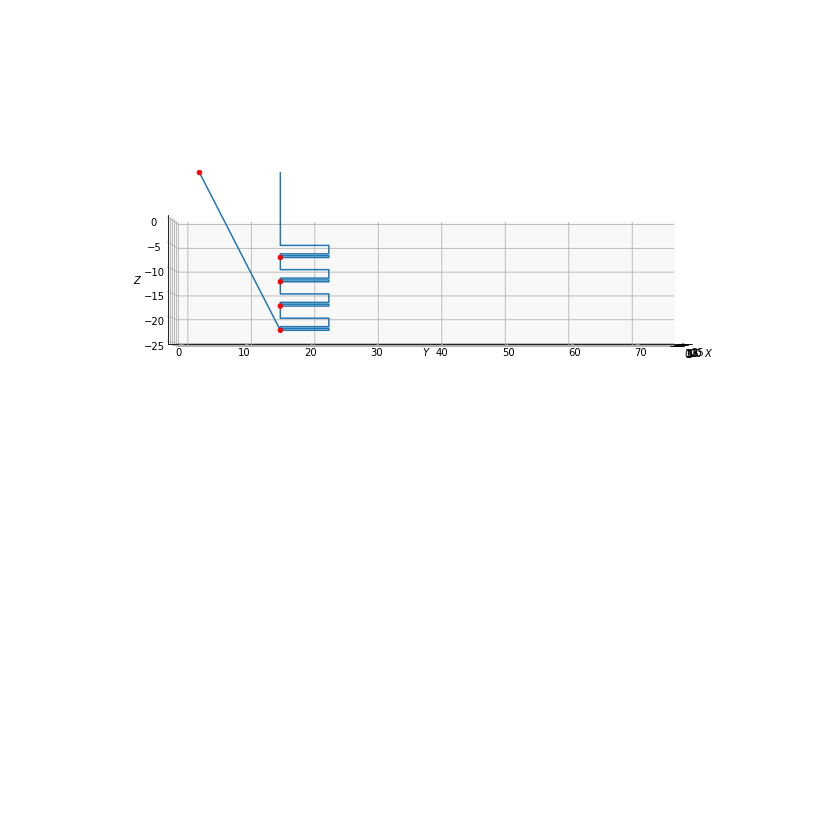

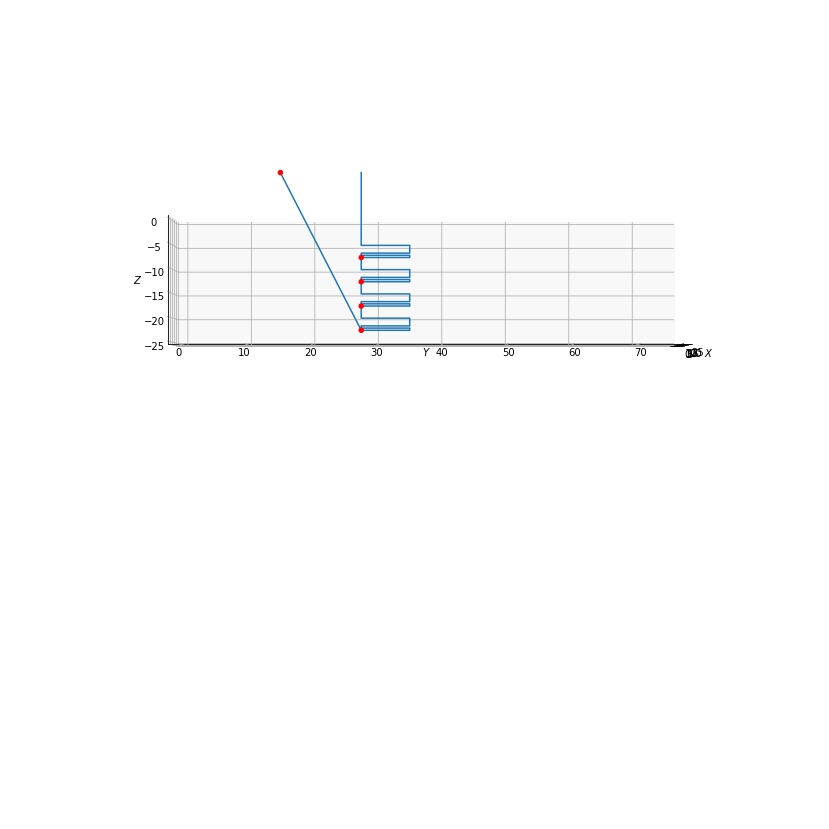

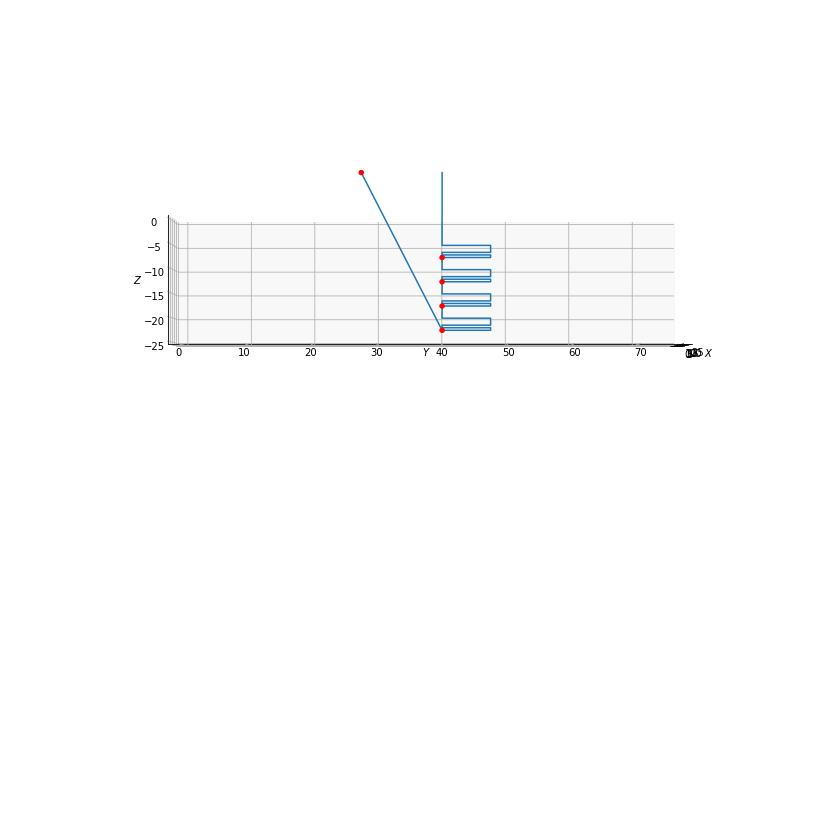

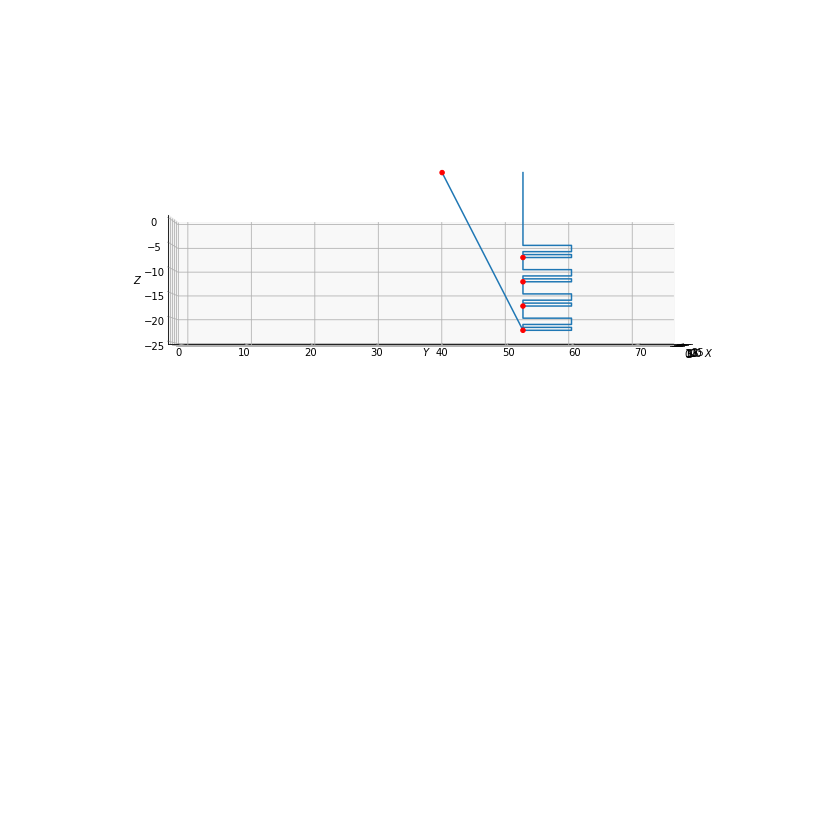

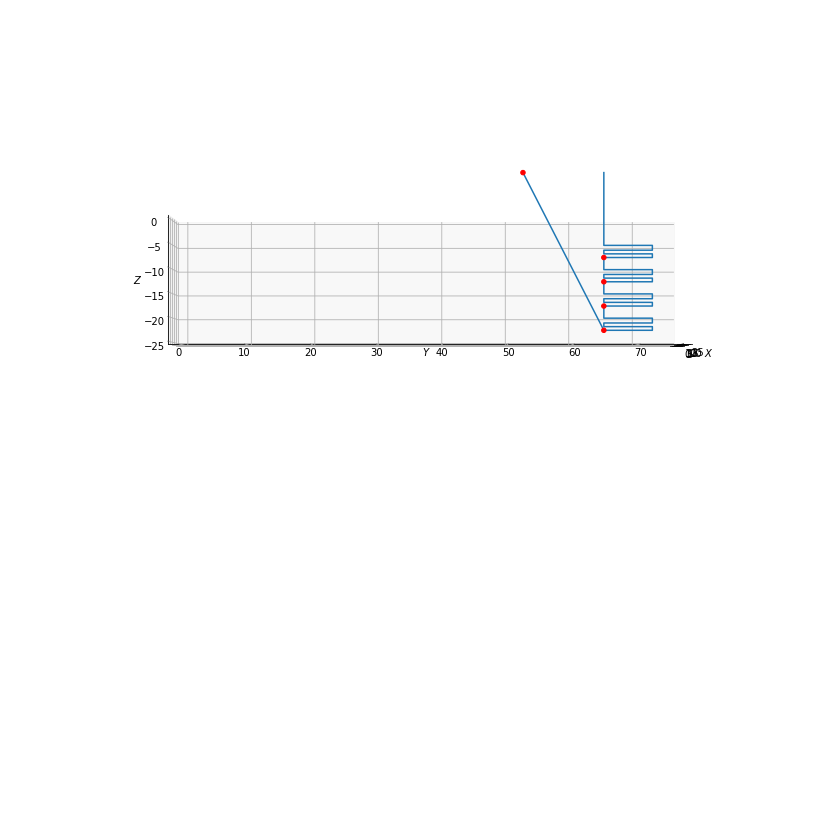

In [45]:
ylast = '&margin/2'
    
# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    total = copy.deepcopy(dv)
    total.addVar('nid', 0.603)
    if i==0:
        total = total + sc.startingPoint(0,0,0)
    else:
        total = total + sc.startingPoint(total1.cp[0], total1.cp[1], total1.cp[2])
    total.turnOn(3)

    total.mx('&slideW/2')

    for z0frac in [0.9, 0.7, 0.5, 0.3]:
# for i,spacing in enumerate([0.5]):
#     for z0frac in [0.9]:
        zz = sc.zigzag(lastPt=total, killZigs=True)
        zz.x0 = '&slideW/2'
        zz.y0 = ylast
        zz.z0 = f'-{z0frac}*&slideW'
        zz.width='1.5*&margin'
        zz.spacing1 = f'&nid*{spacing}'
        zz.spacing2 = f'&nid*{spacing}'
        zz.reps=3
        zz.mz(zz.z0)
        zz.shortdir = '+z'
        zz.longdir = '+y'
        total = total + zz
        total.jz(f'-{z0frac-0.1}*&slideW')
        total.jy(ylast)
    ylast = zz.cp[1]
    ylast = f'{ylast}+&margin'


    total.turnOff(3)
    total.mz(10)
    total.printVolume()
    total.plot(ele=0, azi=0)
    total.export(os.path.join(SBPFOLDER, f'tripleLinesHoriz_{spacing:.3f}.sbp'), [])
    total1 = copy.deepcopy(total)
# print(total.convertFile('spacing'))

0.000 mL, 3 min 46 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesHorizPics.sbp


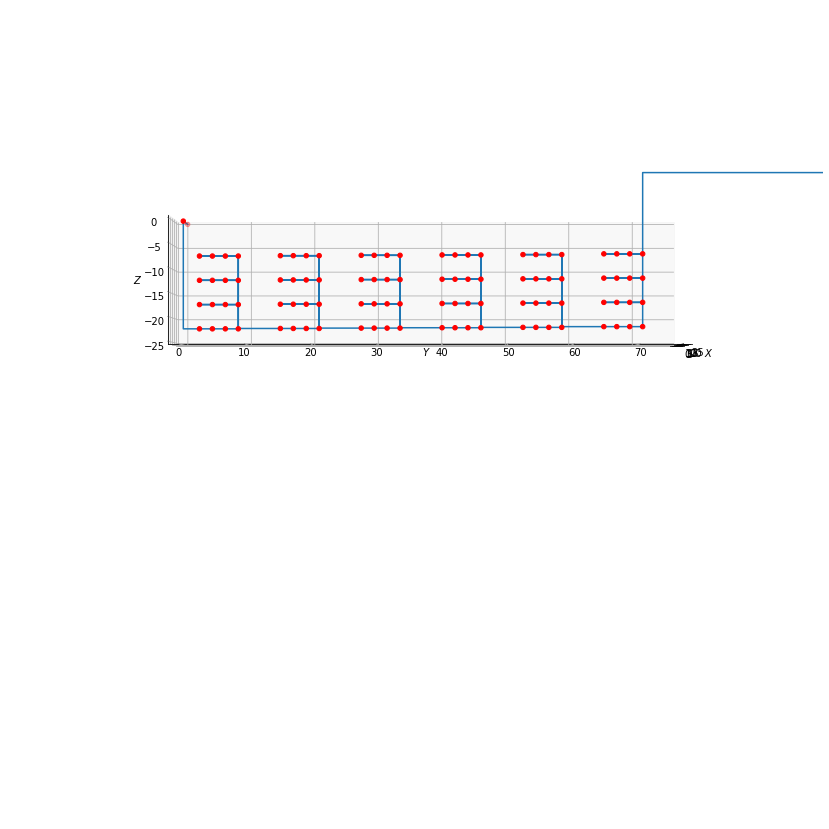

In [54]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(3)
total.setSpeeds(m=5, j=20)
ylast = '&margin/2'
pic = sc.pics(channel=2, wait=2, lastPt=total)
pic.mx('&slideW/2')
pic.snap()
# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    for z0frac in [0.9, 0.7, 0.5, 0.3]:
        pic.mz(f'-{z0frac}*&slideW+&nid*{spacing}')
        for dy in range(0,8,2):
            pic.my(f'{ylast}+{dy}')
            pic.snap()
    ylast = f'{ylast}+2.5*&margin'
total = total+pic

total.turnOff(3)
total.withdraw()
total.printVolume()
total.plot(ele=0, azi=0)
total.export(os.path.join(SBPFOLDER, 'tripleLinesHorizPics.sbp'), [])
# print(total.convertFile('spacing'))

#### test

0.006 mL, 0 min 9 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\t_test.sbp


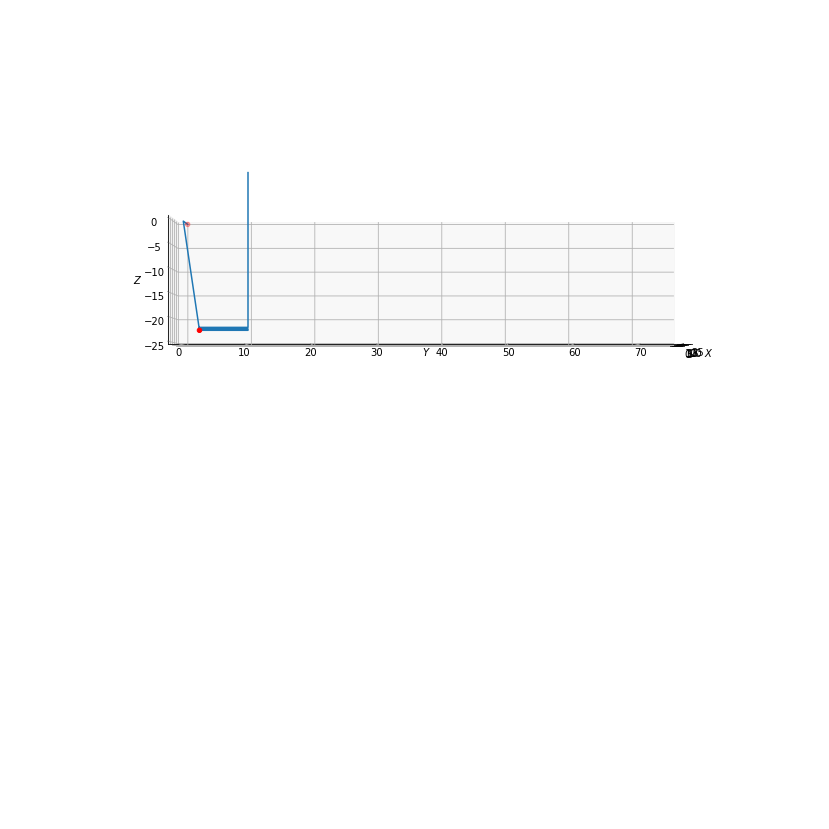

In [5]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(3)

ylast = '&margin/2'
total.mx('&slideW/2')
# head-on, in plane
for i,spacing in enumerate([0.5]):
    for z0frac in [0.9]:
# for i,spacing in enumerate([0.5]):
#     for z0frac in [0.9]:
        zz = sc.zigzag(lastPt=total, killZigs=True)
        zz.x0 = '&slideW/2'
        zz.y0 = ylast
        zz.z0 = f'-{z0frac}*&slideW'
        zz.width='1.5*&margin'
        zz.spacing1 = f'&nid*{spacing}'
        zz.spacing2 = f'&nid*{spacing}'
        zz.reps=3
        zz.mz(zz.z0)
        zz.shortdir = '+z'
        zz.longdir = '+y'
        total = total + zz
    ylast = zz.cp[1]
    ylast = f'{ylast}+&margin'


total.turnOff(3)
total.mz(10)
total.printVolume()
total.plot(ele=0, azi=0)
total.export(os.path.join(SBPFOLDER, 't_test.sbp'), [])
# print(total.convertFile('spacing'))